## Business Case/Objective:

As the new customer acquisition costs for telecom companies typically is 5-10 times more than the cost to retain their existing customers, customer retention is of utmost importance. The objective of this project is to analyze customer level data of a leading telecom firm to build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

Descriptive info on Business Case:
> The project is based on Indian and Southeast Asian market where mostly prepaid payment model is prevelant
> In this project we will use the usage-based chrun definition i.e. customers who have not done any usage either incoming     or outgoing in terms of calls, internet etc. over a period of time.
> We focus only the High Value customers, as typically 80% of the revenue comes from top 20% of the customers
> The dataset spans data of four consecutive months between June - September. The objective is to predict the churn in the   last month using the data from the first three months.
> There are typically three phases of a customer lifecycle - (a) Good Phase where the customer is happy with services. We     have assumed month 6 and 7 as Good Phase period here.(b) Action Phase where customer experience starts to sore. We have     assumed the 3rd month i.e. month 8 here for this (c) Churn Phase where the customer is said to have churned. This is 
  equivalent to the month 9 here.

### Steps Followed
1. Data Loading and Analysis.
    - Understanding the given data by loading the csv as dataframe.
2. Identification of  High Value Customers.
3. Data Preparation.
4. Deriving Churn
    - Created a target variable based on the EDA.
    - Dropped all the other data related to month 9 (september)
5. Test-Train data Split
6. Scaling data
7. Handled imbalance in data
8. Model Building exercise. Using the following algorithms
    - Logistic Regression
    - Decision Tree
    - Random Forest
9. Predict on the test data using the Final Models.
10. Performed PCA 
11. Model Building exercise. Using the following algorithms with PCA.
    - Logistic Regression
    - Decision Tree
    - Random Forest
12. Hyperparameter Tuning
    - Identify best scores for different hyperparameters.
    - Build models using the best scores derived.
13. Predict on the test data using the Final Models.
14. Comparison if models - Evaluation of metrics dervived from different models.
15. Compare the results from all the models used and select the best model
16. Conclusion

In [1]:
#import all the necessary libraries

import warnings
warnings.filterwarnings('ignore')
import os
import csv
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
%matplotlib inline 
from seaborn import countplot, axes_style
import seaborn as sns

from IPython.display import display
pd.set_option('display.max_columns', 500)
pd.options.display.max_rows = 300

# To Scale our data
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler

#to perform the PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from IPython.display import display
pd.set_option('display.max_columns', 500)
pd.options.display.max_rows = 300

In [2]:
data = pd.read_csv('telecom_churn_data.csv')
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
data_orig = data.copy(deep= True)

In [4]:
#Checking the shape of the dataset
data.shape

(99999, 226)

In [5]:
#To understand the names of the columns in dataset and their corresponding data types
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [6]:
#Checking the nature of data
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [7]:
print(data.isnull().sum()*100/data.shape[0])

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

Obs:
1. We can see that these below cols have min, max and median as 0:
    ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou']
    
2. Need to check the variance for the below cols as we can see that there is a larger varaince between median and max:
 ['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_6', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9'

### Looking for the categorical variables

In [8]:
#Checking if the column is a categorical variable or not. as we can see that there are only two values this is a categorical
#variable
data['fb_user_6'].value_counts()

1.0    23000
0.0     2153
Name: fb_user_6, dtype: int64

In [9]:
(data['night_pck_user_6'].value_counts()/len(data.index))*100

0.0    24.522245
1.0     0.631006
Name: night_pck_user_6, dtype: float64

Below are the categorical variables found:
['fb_user_6','fb_user_7', 'fb_user_8', 'fb_user_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8' 'night_pck_user_9']

In [10]:
cat_cols = ['fb_user_6','fb_user_7', 'fb_user_8', 'fb_user_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9']

In [11]:
data[cat_cols] = data[cat_cols].astype(object)

In [12]:
Cols_To_be_dropped = ['circle_id','loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 
                   'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 
                   'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9', 'last_date_of_month_6',
                   'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9']
for col in Cols_To_be_dropped:
    print(data[col].value_counts())

109    99999
Name: circle_id, dtype: int64
0.0    98981
Name: loc_og_t2o_mou, dtype: int64
0.0    98981
Name: std_og_t2o_mou, dtype: int64
0.0    98981
Name: loc_ic_t2o_mou, dtype: int64
0.0    96062
Name: std_og_t2c_mou_6, dtype: int64
0.0    96140
Name: std_og_t2c_mou_7, dtype: int64
0.0    94621
Name: std_og_t2c_mou_8, dtype: int64
0.0    92254
Name: std_og_t2c_mou_9, dtype: int64
0.0    96062
Name: std_ic_t2o_mou_6, dtype: int64
0.0    96140
Name: std_ic_t2o_mou_7, dtype: int64
0.0    94621
Name: std_ic_t2o_mou_8, dtype: int64
0.0    92254
Name: std_ic_t2o_mou_9, dtype: int64
6/30/2014    99999
Name: last_date_of_month_6, dtype: int64
7/31/2014    99398
Name: last_date_of_month_7, dtype: int64
8/31/2014    98899
Name: last_date_of_month_8, dtype: int64
9/30/2014    98340
Name: last_date_of_month_9, dtype: int64


In [13]:
#Dropping these three cols as all the values are either 0 or NaN. This doesnt add value to our analysis.
data.drop(Cols_To_be_dropped, axis=1, inplace = True)

In [14]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 210 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   arpu_6                    float64
 2   arpu_7                    float64
 3   arpu_8                    float64
 4   arpu_9                    float64
 5   onnet_mou_6               float64
 6   onnet_mou_7               float64
 7   onnet_mou_8               float64
 8   onnet_mou_9               float64
 9   offnet_mou_6              float64
 10  offnet_mou_7              float64
 11  offnet_mou_8              float64
 12  offnet_mou_9              float64
 13  roam_ic_mou_6             float64
 14  roam_ic_mou_7             float64
 15  roam_ic_mou_8             float64
 16  roam_ic_mou_9             float64
 17  roam_og_mou_6             float64
 18  roam_og_mou_7             float64
 19  roam_og_mou_8             float64
 20  roam_og_mou_9             f

### Missing Values

In [15]:
#Storing the length of the data frame
data_len = data.shape[0] 
#caluculating % of missing values for each cols
missing_df = pd.DataFrame((data.isnull().sum()*100/data_len).sort_values(ascending = False))
missing_df.reset_index(inplace= True)
missing_df.columns = ['col', 'missing_perc']

In [16]:
missing_df

,col,missing_perc
0,night_pck_user_6,74.846748
1,arpu_2g_6,74.846748
2,count_rech_3g_6,74.846748
3,av_rech_amt_data_6,74.846748
4,count_rech_2g_6,74.846748
5,max_rech_data_6,74.846748
6,fb_user_6,74.846748
7,date_of_last_rech_data_6,74.846748
8,total_rech_data_6,74.846748
9,arpu_3g_6,74.846748


In [17]:
missing_df[missing_df['missing_perc']>70]

,col,missing_perc
0,night_pck_user_6,74.846748
1,arpu_2g_6,74.846748
2,count_rech_3g_6,74.846748
3,av_rech_amt_data_6,74.846748
4,count_rech_2g_6,74.846748
5,max_rech_data_6,74.846748
6,fb_user_6,74.846748
7,date_of_last_rech_data_6,74.846748
8,total_rech_data_6,74.846748
9,arpu_3g_6,74.846748


In [18]:
missing_df[missing_df['missing_perc']>70]['col'].sort_values(ascending = True)

1                    arpu_2g_6
11                   arpu_2g_7
33                   arpu_2g_8
21                   arpu_2g_9
9                    arpu_3g_6
13                   arpu_3g_7
38                   arpu_3g_8
27                   arpu_3g_9
3           av_rech_amt_data_6
15          av_rech_amt_data_7
30          av_rech_amt_data_8
25          av_rech_amt_data_9
4              count_rech_2g_6
18             count_rech_2g_7
39             count_rech_2g_8
28             count_rech_2g_9
2              count_rech_3g_6
16             count_rech_3g_7
37             count_rech_3g_8
23             count_rech_3g_9
7     date_of_last_rech_data_6
17    date_of_last_rech_data_7
36    date_of_last_rech_data_8
20    date_of_last_rech_data_9
6                    fb_user_6
19                   fb_user_7
32                   fb_user_8
24                   fb_user_9
5              max_rech_data_6
14             max_rech_data_7
31             max_rech_data_8
22             max_rech_data_9
0       

As we can see if the recharge is not done in 6th month, the total_recharge, average recharge and and count of recharge is coming to be Nan. Here we can impute these Missing values with 0
And one more observation is the percentage of missing values is same in all for all these columns in the respective months, so we can use the same rational for other columns also

### Missing Value Treatement

In [19]:
Imputing_cols = ['arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 
                 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'max_rech_data_6', 'max_rech_data_7',
                 'max_rech_data_8', 'max_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
                 'total_rech_data_9']

Imputing the missing values of the count, max and total recharge  

In [20]:
data[Imputing_cols] = data[Imputing_cols].fillna(0)

In [21]:
Imputing_cat_cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 
                     'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']
data[Imputing_cat_cols] = data[Imputing_cat_cols].fillna(-1)

In [22]:
(data.isnull().sum()*100/data_len).sort_values(ascending = False)

date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_9    74.077741
date_of_last_rech_data_8    73.660737
std_ic_mou_9                 7.745077
std_og_t2t_mou_9             7.745077
loc_og_t2m_mou_9             7.745077
loc_ic_t2m_mou_9             7.745077
loc_og_t2f_mou_9             7.745077
loc_og_t2c_mou_9             7.745077
loc_og_mou_9                 7.745077
isd_ic_mou_9                 7.745077
std_og_t2f_mou_9             7.745077
ic_others_9                  7.745077
std_og_t2m_mou_9             7.745077
loc_ic_t2f_mou_9             7.745077
loc_ic_t2t_mou_9             7.745077
std_og_mou_9                 7.745077
og_others_9                  7.745077
isd_og_mou_9                 7.745077
loc_og_t2t_mou_9             7.745077
spl_ic_mou_9                 7.745077
spl_og_mou_9                 7.745077
std_ic_t2t_mou_9             7.745077
std_ic_t2m_mou_9             7.745077
onnet_mou_9                  7.745077
offnet_mou_9

In [23]:
#Dropping the below columns as more than 70 % of the column information is missing in these
drop_date_cols = ['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'date_of_last_rech_8',
            'date_of_last_rech_7', 'date_of_last_rech_6', 'date_of_last_rech_9']

data.drop(drop_date_cols, axis=1, inplace = True)

In [24]:
#Checking the current status of the missing values in the existing dataframe
(data.isnull().sum()*100/data_len).sort_values(ascending = False)

std_ic_t2f_mou_9      7.745077
roam_ic_mou_9         7.745077
spl_ic_mou_9          7.745077
loc_og_mou_9          7.745077
loc_og_t2f_mou_9      7.745077
spl_og_mou_9          7.745077
isd_ic_mou_9          7.745077
loc_ic_t2m_mou_9      7.745077
loc_og_t2m_mou_9      7.745077
std_og_t2t_mou_9      7.745077
loc_og_t2t_mou_9      7.745077
ic_others_9           7.745077
std_ic_mou_9          7.745077
roam_og_mou_9         7.745077
std_og_t2m_mou_9      7.745077
loc_ic_t2f_mou_9      7.745077
loc_og_t2c_mou_9      7.745077
onnet_mou_9           7.745077
og_others_9           7.745077
loc_ic_t2t_mou_9      7.745077
offnet_mou_9          7.745077
loc_ic_mou_9          7.745077
std_ic_t2m_mou_9      7.745077
isd_og_mou_9          7.745077
std_og_t2f_mou_9      7.745077
std_ic_t2t_mou_9      7.745077
std_og_mou_9          7.745077
loc_og_mou_8          5.378054
og_others_8           5.378054
isd_og_mou_8          5.378054
std_og_t2f_mou_8      5.378054
std_og_t2t_mou_8      5.378054
ic_other

In [25]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 202 columns):
 #   Column              Dtype  
---  ------              -----  
 0   mobile_number       int64  
 1   arpu_6              float64
 2   arpu_7              float64
 3   arpu_8              float64
 4   arpu_9              float64
 5   onnet_mou_6         float64
 6   onnet_mou_7         float64
 7   onnet_mou_8         float64
 8   onnet_mou_9         float64
 9   offnet_mou_6        float64
 10  offnet_mou_7        float64
 11  offnet_mou_8        float64
 12  offnet_mou_9        float64
 13  roam_ic_mou_6       float64
 14  roam_ic_mou_7       float64
 15  roam_ic_mou_8       float64
 16  roam_ic_mou_9       float64
 17  roam_og_mou_6       float64
 18  roam_og_mou_7       float64
 19  roam_og_mou_8       float64
 20  roam_og_mou_9       float64
 21  loc_og_t2t_mou_6    float64
 22  loc_og_t2t_mou_7    float64
 23  loc_og_t2t_mou_8    float64
 24  loc_og_t2t_mou_9    float64

In [26]:
data.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,

In [27]:
#Replacing the remaining NAN values (5-10%) in the data with median values
data = data.replace(to_replace= np.nan, value = data.median())

In [28]:
(data.isnull().sum()*100/data_len)

mobile_number         0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_mou_9      0.0
loc_og_mou_6          0.0
loc_og_mou_7

In [29]:
data.shape

(99999, 202)

In [30]:
# Percentage of data retained
per_data_ret = round(100*(len(data)/99999),2)
print(per_data_ret)

100.0


### Calculating High Value Customers (HVC)

In [31]:
data[['total_rech_data_6','av_rech_amt_data_6','total_rech_num_6','total_rech_amt_6']]

,total_rech_data_6,av_rech_amt_data_6,total_rech_num_6,total_rech_amt_6
0,1.0,252.0,4,362
1,0.0,0.0,4,74
2,0.0,0.0,5,168
3,0.0,0.0,10,230
4,1.0,56.0,5,196
...,...,...,...,...
99994,0.0,0.0,2,60
99995,0.0,0.0,5,110
99996,2.0,39.0,5,119
99997,3.0,583.0,3,381


In [32]:
# Calculating the total data recharge amount for the months - 6 & 7, that is  average recharge data amount*total number of data recharges
data['total_rech_data_amount_6'] = data['av_rech_amt_data_6'] * data['total_rech_data_6']
data['total_rech_data_amount_7'] = data['av_rech_amt_data_7'] * data['total_rech_data_7']

In [33]:
# Calculating the total recharge amount for the months - 6 & 7, that is  call recharge amount + data recharge amount
data['total_recharge_amt_6'] = data['total_rech_data_amount_6'] + data['total_rech_amt_6']
data['total_recharge_amt_7'] = data['total_rech_data_amount_7'] + data['total_rech_amt_7']

In [34]:
# Calculating the total average of the recharge amount for the months - 6 & 7
data['avg_recharge_amt_6_7'] = (data.total_recharge_amt_6 + data.total_recharge_amt_7)/2

In [35]:
# Finding the 70th percentile of the total average recharge amount
per_70_Avg_val = data.avg_recharge_amt_6_7.quantile(0.7)
print("70th percentile value of Total Recharge Amount for months 6 & 7 is: {0}".format(per_70_Avg_val))

70th percentile value of Total Recharge Amount for months 6 & 7 is: 478.0


In [36]:
#The shape of the dataframe with all the customers
data.shape

(99999, 207)

In [37]:
# Deriving the high value customers from data by considering the data with avg_recharge_amt 
# for the months -6 & 7 greater than or equal to 70th Percentile
data_HVC = data[data.avg_recharge_amt_6_7 >= per_70_Avg_val]
data_HVC.shape

(30001, 207)

In [38]:
# Dropping the columns from data_HVC that are used to arrive at 'avg_recharge_amt_6_7'
data_HVC =  data_HVC.drop(['total_rech_data_amount_6', 'total_rech_data_amount_7','total_recharge_amt_6', 'total_recharge_amt_7'], axis=1)
data_HVC.shape

(30001, 203)

In [39]:
# Dropping 'mobile_number' as it is not required in analysis
data_HVC =  data_HVC.drop(['mobile_number'], axis=1)
data_HVC.shape


(30001, 202)

In [40]:
data_HVC.shape

(30001, 202)

Left with approximately 30k records after considering the HCV as above

### Deriving Churn

In [41]:
data_HVC.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 202 columns):
 #   Column                Dtype  
---  ------                -----  
 0   arpu_6                float64
 1   arpu_7                float64
 2   arpu_8                float64
 3   arpu_9                float64
 4   onnet_mou_6           float64
 5   onnet_mou_7           float64
 6   onnet_mou_8           float64
 7   onnet_mou_9           float64
 8   offnet_mou_6          float64
 9   offnet_mou_7          float64
 10  offnet_mou_8          float64
 11  offnet_mou_9          float64
 12  roam_ic_mou_6         float64
 13  roam_ic_mou_7         float64
 14  roam_ic_mou_8         float64
 15  roam_ic_mou_9         float64
 16  roam_og_mou_6         float64
 17  roam_og_mou_7         float64
 18  roam_og_mou_8         float64
 19  roam_og_mou_9         float64
 20  loc_og_t2t_mou_6      float64
 21  loc_og_t2t_mou_7      float64
 22  loc_og_t2t_mou_8      float64
 23  loc_og_t2t

In [42]:
#Calculating the total incoming and outgoing minutes of usage for the 9th month(September)
#This can be used if there is any usage of the mobile number for calls in the churn phase
Total_ic_og_mou_9 = data_HVC['total_calls_mou_9'] = data_HVC.total_ic_mou_9 + data_HVC.total_og_mou_9

In [43]:
# Calculating total 2g and 3g data consumption for the 9th month(September)
#This can be used if there is any usage of the mobile number for data in the churn phase
data_HVC['total_intr_data_mb_9'] =  data_HVC.vol_2g_mb_9 + data_HVC.vol_3g_mb_9

In [44]:
# The churn of the customer is based on the data that the customer hasn't made any outgoing calls or received any incoming calls
# And also hasn't used any 2g or 3g data for the 9th month(September).
# That is, the customer churned is indicated with '1' and not churned is indicated with '0'.

def is_cust_Churned(dataFrame):
    if ( (dataFrame['total_ic_mou_9'] == 0 ) and (dataFrame['total_og_mou_9'] == 0) 
        and (dataFrame['vol_2g_mb_9'] == 0) and (dataFrame['vol_3g_mb_9'] == 0) ) :       
        return 1
    else:
        return 0
data_HVC['cust_churned'] = data_HVC.apply(is_cust_Churned, axis=1)
data_HVC.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_recharge_amt_6_7,total_calls_mou_9,total_intr_data_mb_9,cust_churned
0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,65.11,63.685,0.00,61.84,0.00,0.00,0.00,0.00,3.95,3.635,0.00,2.50,0.00,0.00,0.00,0.00,11.64,11.09,0.00,8.41,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,0.88,0.93,1.15,0.96,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.0,5.89,5.96,0.00,5.38,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.00,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,-1.0,968,30.40,0.00,101.20,3.58,559.0,0.00,0.00,1
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52

In [45]:
#Calculating the Churn Percentage of the customers in the 9th month(September).
print(data_HVC.cust_churned.value_counts()*100/data_HVC.shape[0])

0    91.863605
1     8.136395
Name: cust_churned, dtype: float64


Approximately 8.14% of the customers have churned in the 9th month(September)

In [46]:
#Dropping the columns related to the 9th Month(September).
cols_9_To_be_dropped = [x for x in data_HVC.columns if '_9' in x]
print('Columns of 9th month data to be dropped :  ', cols_9_To_be_dropped)
data_HVC = data_HVC.drop(cols_9_To_be_dropped, axis=1)

Columns of 9th month data to be dropped :   ['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'total_calls_mou_9', 'total_intr_data_mb_9']


In [47]:
data_HVC.shape

(30001, 154)

### Outlier Treatment

In [48]:
data_HVC.describe(percentiles=[.25,.5,.75,.80,.85,.90,.93,.94,.95,.97,.98,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_recharge_amt_6_7,cust_churned
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,3000

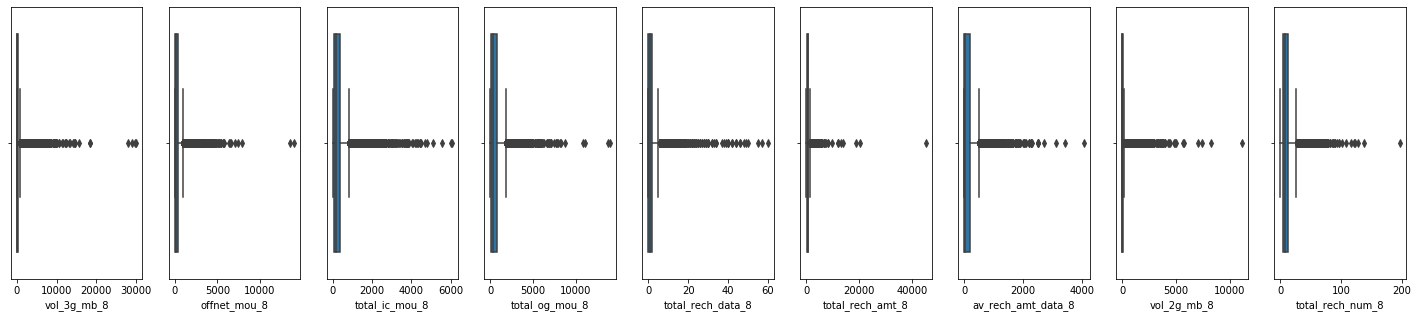

In [49]:
# Based on the above, checking the outliers in few important columns - 'vol_3g_mb_8','offnet_mou_8','total_ic_mou_8','total_og_mou_8','total_rech_data_8','total_rech_amt_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'total_rech_num_8'

plt.figure(figsize=(25,5))
features = ['vol_3g_mb_8','offnet_mou_8','total_ic_mou_8','total_og_mou_8','total_rech_data_8',
            'total_rech_amt_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'total_rech_num_8']
for i in enumerate(features):
    ax = plt.subplot(1,9, i[0]+1)
    sns.boxplot(i[1], data = data_HVC)

In [50]:
data_HVC[['total_rech_amt_8', 'total_rech_num_8', 'total_rech_data_8','vol_3g_mb_8','vol_2g_mb_8']].describe(percentiles=[.8,.85,.90,.95])

,total_rech_amt_8,total_rech_num_8,total_rech_data_8,vol_3g_mb_8,vol_2g_mb_8
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,584.365454,9.972868,1.621913,351.493998,105.913072
std,611.245907,9.274370,2.996010,919.021056,313.384838
min,0.000000,0.000000,0.000000,0.000000,0.000000
50%,490.000000,8.000000,1.000000,0.000000,0.000000
80%,860.000000,15.000000,2.000000,563.140000,96.000000
85%,984.000000,17.000000,3.000000,804.240000,171.470000
90%,1148.000000,21.000000,5.000000,1105.170000,318.950000
95%,1490.000000,28.000000,7.000000,1736.240000,613.020000
max,45320.000000,196.000000,60.000000,30036.060000,11117.610000


In [51]:
#Capping the outliers (greater than 95th percentile) to the 95th percentile value for 'total_rech_amt_8'
data_HVC["total_rech_amt_8"] =np.where(data_HVC["total_rech_amt_8"]>=1490,1490,data_HVC["total_rech_amt_8"])
# sns.boxplot(x= data_HVC["total_rech_amt_8"])

#Capping the outliers (greater than 95th percentile) to the 90th percentile value for 'total_rech_num_8'
data_HVC["total_rech_num_8"] =np.where(data_HVC["total_rech_num_8"]>=21,21,data_HVC["total_rech_num_8"])
# sns.boxplot(x= data_HVC["total_rech_num_8"])

#Capping the outliers (greater than 95th percentile) to the 90th percentile value for 'total_rech_data_8'
data_HVC["total_rech_data_8"] =np.where(data_HVC["total_rech_data_8"]>=5,5,data_HVC["total_rech_data_8"])
# sns.boxplot(x= data_HVC["total_rech_data_8"])

#Capping the outliers (greater than 95th percentile) to the 85th percentile value for 'vol_3g_mb_8'
data_HVC["vol_3g_mb_8"] =np.where(data_HVC["vol_3g_mb_8"]>=804,804,data_HVC["vol_3g_mb_8"])
# sns.boxplot(x= data_HVC["vol_3g_mb_8"])

#Capping the outliers (greater than 80th percentile) to the 80th percentile value for 'vol_2g_mb_8'
data_HVC["vol_2g_mb_8"] =np.where(data_HVC["vol_2g_mb_8"]>=96,96,data_HVC["vol_2g_mb_8"])
# sns.boxplot(x= data_HVC["vol_2g_mb_8"])

#Capping the outliers (greater than 93rd percentile) to the 93rd percentile value for 'offnet_mou_8'
data_HVC["offnet_mou_8"] =np.where(data_HVC["offnet_mou_8"]>=991,991,data_HVC["offnet_mou_8"])
# sns.boxplot(x= data_HVC["offnet_mou_8"])

#Capping the outliers (greater than 93rd percentile) to the 93rd percentile value for 'av_rech_amt_data_8'
data_HVC["av_rech_amt_data_8"] =np.where(data_HVC["av_rech_amt_data_8"]>=449,449,data_HVC["av_rech_amt_data_8"])
# sns.boxplot(x= data_HVC["av_rech_amt_data_8"])

#Capping the outliers (greater than 93rd percentile) to the 93rd percentile value for 'total_og_mou_8'
data_HVC["total_og_mou_8"] =np.where(data_HVC["total_og_mou_8"]>=1715,1715,data_HVC["total_og_mou_8"])
# sns.boxplot(x= data_HVC["total_og_mou_8"])

#Capping the outliers (greater than 90th percentile) to the 90th percentile value for 'total_ic_mou_8'
data_HVC["total_ic_mou_8"] =np.where(data_HVC["total_ic_mou_8"]>=786,786,data_HVC["total_ic_mou_8"])
# sns.boxplot(x= data_HVC["total_ic_mou_8"])

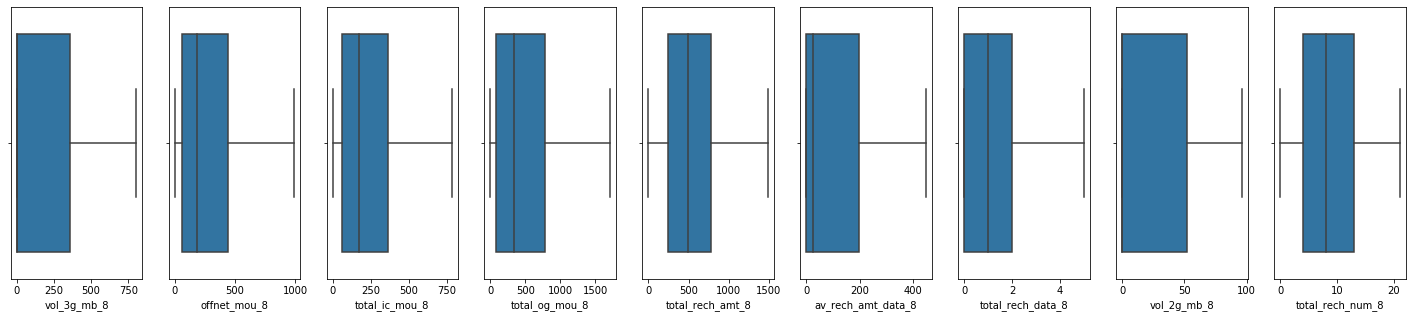

In [52]:
# Based on the above, checking the outliers post-treatment in few important columns - 'vol_3g_mb_8','offnet_mou_8','total_ic_mou_8','total_og_mou_8','total_rech_data_8','total_rech_amt_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'total_rech_num_8'

plt.figure(figsize=(25,5))
features = ['vol_3g_mb_8','offnet_mou_8','total_ic_mou_8','total_og_mou_8',
            'total_rech_amt_8', 'av_rech_amt_data_8','total_rech_data_8', 'vol_2g_mb_8', 'total_rech_num_8']
for i in enumerate(features):
    ax = plt.subplot(1,9, i[0]+1)
    sns.boxplot(i[1], data = data_HVC)

In [53]:
# Percentage of Data retained after addressing outliers
data_retained = round(100*(len(data_HVC)/30001),2)
print("Data retained after addressing outliers : ",data_retained,"%")


Data retained after addressing outliers :  100.0 %


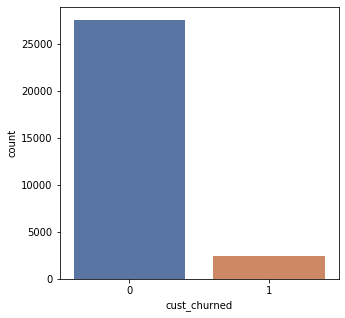

In [54]:
#Plot a count plot based on the target variable 'cust_churned'
plt.figure(figsize=(5,5))
sns.countplot(x = "cust_churned", palette='deep', data = data_HVC)
plt.xticks(rotation = 0)
plt.show()

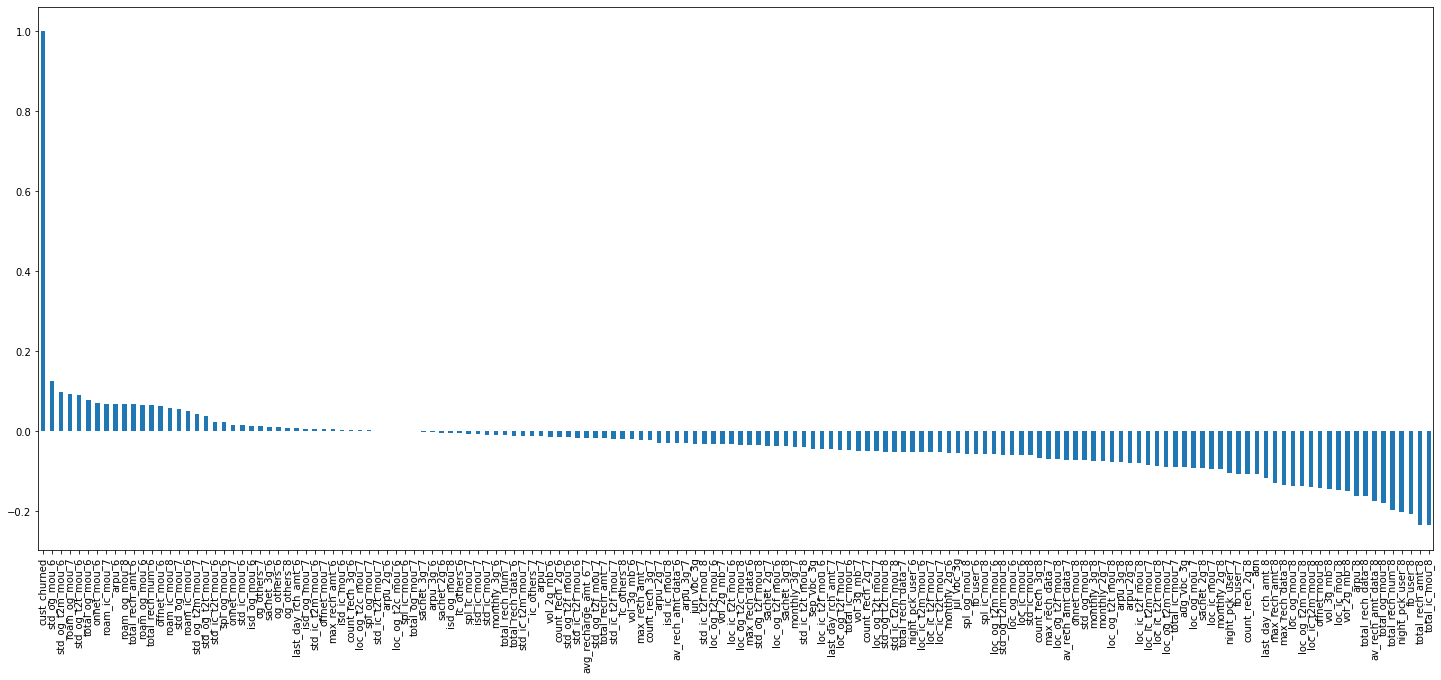

In [55]:
#To check the highly correlated features with the cust_churned feature. 
plt.figure(figsize=(25,10))
data_HVC.corr()['cust_churned'].sort_values(ascending = False).plot(kind='bar')
plt.show()

In [56]:
corr1 = data_HVC.corr()
corr1

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_recharge_amt_6_7,cust_churned
arpu_6,1.000000,0.671732,0.612617,0.341782,0.216219,0.187305,0.508114,0.339951,0.299725,0.126884,0.083484,0.090363,0.196086,0.143261,0.124994,0.166776,0.127681,0.123995,0.330788,0.245394,0.219607,0.139434,0.114368,0.104302,0.047680,0.010017,0.011393,0.327499,0.246516,0.224799,0.274093,0.161528,0.133795,0.301481,0.181419,0.139826,0.066751,0.053564,0.043895,0.385695,0.230406,0.182159,0.466898,0.420753,0.413504,0.122743,0.068491,0.044582,0.054782,0.024347,0.015490,0.554510,0.363276,0.298293,0.081747,0.062923,0.063284,0.185927,0.149405,0.125890,0.051283,0.039198,0.037451,0.178888,0.142728,0.126146,0.088103,0.061598,0.056880,0.098536,0.065705,0.062957,0.034451,0.032583,0.022957,0.124639,0.085674,0.079524,0.225987,0.169024,0.168585,0.031356,-0.034186,-0.011741,0.103090,0.063193,0.070653,0.016183,0.023868,0.012284,0.349709,0.136098,0.109897,0.946125,0.650611,0.397067,0.337983,0.261993,0.284518,0.266656,0.207282,0.199304,-0.108914,-0.175490,-0.146921,0.072714,-0.021877,0.025203,-0.165470,-0.208538,-0.161828,0.090485,0.020223,0.035060,0.115368,-0.026426,-0.049266,-0.062580,-0.098980,-0.122935,0.152507,0.070184,-0.022657,0.246392,0.117107,0.137956,0.218557,0.094322,0.118946,-0.110288,-0.192870,-0.120593,-0.039073,-0.084189,-0.061430,-0.158359,-0.193927,-0.152069,0.176436,0.081091,0.103661,-0.002555,-0.025233,-0.017509,-0.122195,-0.203611,-0.137702,0.041451,0.058547,0.055172,0.112462,0.045053,0.368357,0.067624
arpu_7,0.671732,1.000000,0.759858,0.211488,0.320178,0.269405,0.351848,0.488950,0.388399,0.092501,0.093692,0.093961,0.133520,0.179894,0.152217,0.106519,0.157367,0.134499,0.215226,0.301642,0.253859,0.112066,0.140968,0.121890,0.009198,0.040485,0.032706,0.213265,0.302955,0.253670,0.166621,0.260775,0.219911,0.203718,0.307701,0.238948,0.051743,0.070678,0.0538

### Model building

In [57]:
#Importing necessary libraries for test-train split
from sklearn.model_selection import train_test_split
np.random.seed(0)

In [58]:
## Assigning a feature variable 'X' by dropping the target variable column 'cust_churned'
X = data_HVC.drop(['cust_churned'], axis=1)
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_recharge_amt_6_7
0,197.385,214.816,213.803,34.31,32.33,0.00,96.31,91.735,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.91,11.61,0.00,41.03,40.43,0.00,0.00,0.00,0.00,0.0,0.0,0.00,65.11,63.685,0.00,0.00,0.00,0.00,3.95,3.635,0.00,0.00,0.00,0.00,11.64,11.09,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,15.69,15.74,0.16,56.49,57.08,4.13,0.88,0.93,1.15,92.16,92.55,5.44,0.00,0.00,0.00,2.03,2.04,0.00,0.00,0.00,0.00,5.89,5.96,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,559.0
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.160,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.910,255.79,4.30,23.29,12.01,49.89,31.760,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1490,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,0.00,1185.0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.630,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.180,63.04,116.56,133.43,22.58,13.69,10.040,75.69,0.00,0.00,0.00,130.

In [59]:
# Assigning a response variable 'y' 
y = data_HVC['cust_churned']

#### Test_Train Data Split

In [60]:
# Splitting the dataframe into Train and Test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [61]:
X_train.shape

(21000, 153)

In [62]:
X_test.shape

(9001, 153)

### Scaling the data

In [63]:
#Using Standard scaler to Standardize the data
#Importing necessary libraries for Standardizing

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_cols = X_train.columns

In [64]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [65]:
print("X_train :", X_train.shape)
print("X_test :", X_test.shape)

X_train : (21000, 153)
X_test : (9001, 153)


### Handling Data Imbalance


In [66]:
# Checking the class imbalance in train and test data for target variable

y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
    
print("Imbalance in the Train Data : ", y_train_imb)
print("Imbalance in the Test Data : ", y_test_imb)

Imbalance in the Train Data :  0.08757574188202392
Imbalance in the Test Data :  0.09089807296085323


In [67]:
# Applying SMOTE(Synthetic Minority Oversampling Technique) on the train dataset for handing the class imbalance in the data
# Importing necessary packages for SMOTE

from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state = 42)

X_train_1,y_train_1 = smt.fit_sample(X_train,y_train)

print("X_train_1 Shape", X_train_1.shape)
print("y_train_1 Shape", y_train_1.shape)

imbalance = (y_train_1 != 0).sum()/(y_train_1 == 0).sum()
print("Imbalance in the Train Data : ",imbalance)

X_train_1 Shape (38618, 153)
y_train_1 Shape (38618,)
Imbalance in the Train Data :  1.0


In [68]:
# Transforming the arrays into dataframes

X_train_1 = pd.DataFrame(X_train_1, columns=X_train_cols)
y_train_1 = pd.DataFrame(y_train_1, columns=['cust_churned'])

display(X_train_1.head())
display(y_train_1.head())

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_recharge_amt_6_7
0,1.115484,0.688737,0.152667,-0.559312,-0.543098,-0.501847,-0.466187,-0.442957,-0.654529,0.166015,0.177751,0.252122,-0.178395,-0.062395,-0.095051,-0.348812,-0.324844,-0.318853,-0.565943,-0.549298,-0.569585,-0.227853,-0.290731,-0.304296,-0.254831,0.482122,-0.077536,-0.600265,-0.580504,-0.582545,-0.411127,-0.413976,-0.373254,-0.433608,-0.407852,-0.350906,-0.156374,-0.141659,-0.143638,-0.567690,-0.550899,-0.481454,2.238915,1.762919,0.997135,-0.326117,0.065368,-0.272720,-0.140957,-0.01516,-0.016828,-0.665728,-0.661873,-0.794796,-0.307478,-0.189593,-0.106247,-0.085248,-0.059517,-0.202093,-0.178038,-0.128034,-0.280444,-0.244727,-0.161955,-0.238383,-0.184858,-0.179917,-0.191835,-0.117708,0.019601,0.279223,-0.135600,-0.136123,-0.124243,-0.208529,-0.107943,0.091271,0.378162,0.154991,0.087913,-0.308577,-0.13577,-0.234992,3.273325,1.628862,0.689833,-0.074812,0.027293,-0.088662,-0.415802,-0.717597,-0.969133,1.415590,0.373331,0.266240,1.293454,1.573734,0.391372,2.047579,-0.456642,0.716280,-0.587543,-0.598072,-0.767961,-0.694135,-0.700252,-0.656217,-0.493257,-0.511751,-0.476808,-0.367574,-0.356341,-0.324914,-0.664112,-0.670667,-0.783334,-0.388365,-0.375952,-0.673786,-0.364613,-0.394511,-0.623619,-0.378436,-0.371852,-0.366982,-0.400634,-0.386089,-0.381471,-1.099871,-1.123998,-1.048154,-0.401189,-0.408175,-0.376513,-0.423358,-0.442850,-0.416085,-0.360796,-0.34396,-0.343262,-0.211037,-0.207517,-0.184095,-1.106005,-1.127047,-1.042887,2.582178,-0.401980,-0.400504,-0.382233,-0.15069,0.024772
1,-0.096775,-0.500253,-0.275833,-0.253700,-0.456323,-0.423795,-0.113343,-0.306586,-0.093742,-0.211944,-0.168046,-0.169673,-0.232413,-0.211540,-0.192132,-0.091015,-0.229737,-0.164608,0.440469,0.063247,0.250323,0.253079,-0.057653,1.482865,-0.254831,1.558365,-0.224949,0.253166,-0.111422,0.132197,

,cust_churned
0,0
1,0
2,0
3,0
4,0


In [69]:
#Removed the data imbalance in the existing dataset
y_train_1['cust_churned'].value_counts()

1    19309
0    19309
Name: cust_churned, dtype: int64

In [70]:
y_train_1.values

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [71]:
X_train_1.shape

(38618, 153)

In [72]:
y_train_1.shape

(38618, 1)

## Logistic Regression without PCA

In [73]:
X_train_1.shape

(38618, 153)

In [74]:
y_train_1.shape

(38618, 1)

In [75]:
#Importing necessary packages from Logistic Regression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

In [76]:
# Applying Logistic Regression on the train dataset
logm = sm.GLM(y_train_1,(sm.add_constant(X_train_1)), family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           cust_churned   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38472
Model Family:                Binomial   Df Model:                          145
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12940.
Date:                Mon, 18 May 2020   Deviance:                       25879.
Time:                        17:09:25   Pearson chi2:                 7.81e+04
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.0812      0.034    -60.332      0.000      -2.149      -2.014
arpu_6                   0.1144      0.070      1.629      0.103      -0.023       0.252
arpu_7                   0.4518      0.087      5.197      0.000       0.281       0.622
arpu_8                   0.3152      0.078      4.031      0.000       0.162       0.468
onnet_mou_6             -0.2366      1.328     -0.178      0.859      -2.839       2.366
onnet_mou_7             -4.9782      1.279     -3.891      0.000      -7.486      -2.471
onnet_mou_8             -0.1265      0.267     -0.473      0.636      -0.651       0.398
offnet_mou_6             0.1791      1.379      0.130      0.897      -2.523       2.882
offnet_mou_7            -5.7657      1.296     -4.450      0.000      -8.305      -3.227
offnet_mou_8            -0.0204      0.056     -0.363      0.717      -0.130       0.090
roam_ic_mou_6            0.0175      0.025      0.696      0.487      -0.032       0.067
roam_ic_mou_7            0.0867      0.026      3.381      0.001       0.036       0.137
roam_ic_mou_8           -0.0319      0.019     -1.691      0.091      -0.069       0.005
roam_og_mou_6           -0.0585      0.329     -0.178      0.859      -0.703       0.586
roam_og_mou_7            1.2518      0.252      4.975      0.000       0.759       1.745
roam_og_mou_8            0.0007      0.039      0.018      0.985      -0.076       0.077
loc_og_t2t_mou_6      -932.7027    732.590     -1.273      0.203   -2368.553     503.147
loc_og_t2t_mou_7     -1691.3888    768.313     -2.201      0.028   -3197.256    -185.522
loc_og_t2t_mou_8       643.8077    721.287      0.893      0.372    -769.889    2057.504
loc_og_t2m_mou_6     -1034.9097    812.669     -1.273      0.203   -2627.712     557.893
loc_og_t2m_mou_7     -1686.8919    766.271     -2.201      0.028   -3188.755    -185.028
loc_og_t2m_mou_8       647.4346    725.371      0.893      0.372    -774.267    2069.136
loc_og_t2f_mou_6       -92.7613     72.800     -1.274      0.203    -235.447      49.925
loc_og_t2f_mou_7      -154.2186     70.032     -2.202      0.028    -291.478     -16.959
loc_og_t2f_mou_8        53.5334     59.948      0.893      0.372     -63.962     171.029
loc_og_t2c_mou_6        -0.1654      0.027     -6.152      0.000      -0.218      -0.113
loc_og_t2c_mou_7        -0.0802      0.035     -2.292      0.022      -0.149      -0.012
loc_og_t2c_mou_8         0.1523      0.030      5.047      0.000       0.093       0.211
loc_og_mou_6         -1009.5863   1381.043     -0.731      0.465   -3716.380    1697.207
loc_og_mou_7           959.3310   1413.743      0.679      0.497   -1811.554    3730.216
loc_og_mou_8         -1016.4829   1137.687     -0.893      0.372   -3246.309    1213.343
std_og_t2t_mou_6      2831.0107   1548.145      1.829    

### Feature Selection using RFE

In [77]:
#Importing necessary libraries
from sklearn.feature_selection import RFE

In [78]:
logreg = LogisticRegression()

In [79]:
# Running the RFE by considering to have 15 variables in o/p
rfe = RFE(logreg, 15)           
rfe = rfe.fit(X_train_1, y_train_1)
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False,  True,
        True, False,  True, False, False,  True, False, False,  True,
       False, False,  True,  True, False,  True,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [80]:
list(zip(X_train_1.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 44),
 ('arpu_7', False, 10),
 ('arpu_8', False, 121),
 ('onnet_mou_6', False, 20),
 ('onnet_mou_7', False, 80),
 ('onnet_mou_8', False, 69),
 ('offnet_mou_6', False, 21),
 ('offnet_mou_7', False, 23),
 ('offnet_mou_8', False, 34),
 ('roam_ic_mou_6', False, 109),
 ('roam_ic_mou_7', False, 60),
 ('roam_ic_mou_8', False, 122),
 ('roam_og_mou_6', False, 29),
 ('roam_og_mou_7', False, 94),
 ('roam_og_mou_8', False, 78),
 ('loc_og_t2t_mou_6', False, 87),
 ('loc_og_t2t_mou_7', False, 124),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 76),
 ('loc_og_t2m_mou_7', False, 25),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 88),
 ('loc_og_t2f_mou_7', False, 138),
 ('loc_og_t2f_mou_8', False, 12),
 ('loc_og_t2c_mou_6', False, 54),
 ('loc_og_t2c_mou_7', False, 64),
 ('loc_og_t2c_mou_8', False, 63),
 ('loc_og_mou_6', False, 74),
 ('loc_og_mou_7', False, 26),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 115),
 ('std_og_t2t_mou_7', False, 117)

In [81]:
rfe_s_cols = X_train_1.columns[rfe.support_]
rfe_s_cols

Index(['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_6', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8',
       'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_8', 'total_ic_mou_6',
       'total_ic_mou_8'],
      dtype='object')

### Analyzing using Statsmodels

In [82]:
X_train_1_sm = sm.add_constant(X_train_1[rfe_s_cols])
logregsm1 = sm.GLM(y_train_1,X_train_1_sm, family = sm.families.Binomial())
outcome = logregsm1.fit()
outcome.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           cust_churned   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38602
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17299.
Date:                Mon, 18 May 2020   Deviance:                       34598.
Time:                        17:11:11   Pearson chi2:                 9.23e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.3653      0.027    -50.425      0.000      -1.418      -1.312
loc_og_t2t_mou_8     0.2410      0.343      0.702      0.483      -0.432       0.914
loc_og_t2m_mou_8    -0.1074      0.351     -0.306      0.760      -0.796       0.581
loc_og_mou_8        -0.7675      0.537     -1.429      0.153      -1.820       0.285
loc_ic_t2t_mou_8   105.1002    109.631      0.959      0.338    -109.773     319.973
loc_ic_t2m_mou_8   141.0348    147.034      0.959      0.337    -147.148     429.217
loc_ic_t2f_mou_8    27.9800     29.463      0.950      0.342     -29.765      85.725
loc_ic_mou_6         0.6133      0.094      6.530      0.000       0.429       0.797
loc_ic_mou_8      -203.1985    210.176     -0.967      0.334    -615.136     208.738
std_ic_t2t_mou_8  -302.1092    236.280     -1.279      0.201    -765.209     160.991
std_ic_t2m_mou_8  -443.4729    346.922     -1.278      0.201   -1123.428     236.482
std_ic_t2f_mou_8   -88.0900     68.672     -1.283      0.200    -222.684      46.504
std_ic_mou_6         0.2681      0.046      5.779      0.000       0.177       0.359
std_ic_mou_8       595.2192    465.864      1.278      0.201    -317.857    1508.295
total_ic_mou_6       0.2161      0.098      2.198      0.028       0.023       0.409
total_ic_mou_8      -0.6288      0.080     -7.888      0.000      -0.785      -0.473
====================================================================================
"""

In [83]:
#Dropping 'loc_og_t2m_mou_8' which has a high p-value
cols_2 = rfe_s_cols.drop('loc_og_t2m_mou_8',1)

In [84]:
X_train_1_sm = sm.add_constant(X_train_1[cols_2])
logregsm2 = sm.GLM(y_train_1,X_train_1_sm, family = sm.families.Binomial())
outcome = logregsm2.fit()
outcome.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           cust_churned   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38603
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17299.
Date:                Mon, 18 May 2020   Deviance:                       34598.
Time:                        17:11:12   Pearson chi2:                 9.23e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.3650      0.027    -50.447      0.000      -1.418      -1.312
loc_og_t2t_mou_8     0.3443      0.061      5.623      0.000       0.224       0.464
loc_og_mou_8        -0.9306      0.064    -14.626      0.000      -1.055      -0.806
loc_ic_t2t_mou_8   104.5194    109.614      0.954      0.340    -110.321     319.360
loc_ic_t2m_mou_8   140.2548    147.012      0.954      0.340    -147.883     428.393
loc_ic_t2f_mou_8    27.8279     29.458      0.945      0.345     -29.909      85.565
loc_ic_mou_6         0.6136      0.094      6.540      0.000       0.430       0.797
loc_ic_mou_8      -202.0860    210.144     -0.962      0.336    -613.960     209.788
std_ic_t2t_mou_8  -300.9554    236.249     -1.274      0.203    -763.995     162.085
std_ic_t2m_mou_8  -441.7786    346.877     -1.274      0.203   -1121.646     238.088
std_ic_t2f_mou_8   -87.7536     68.663     -1.278      0.201    -222.330      46.823
std_ic_mou_6         0.2682      0.046      5.786      0.000       0.177       0.359
std_ic_mou_8       592.9438    465.803      1.273      0.203    -320.014    1505.901
total_ic_mou_6       0.2158      0.098      2.198      0.028       0.023       0.408
total_ic_mou_8      -0.6280      0.080     -7.879      0.000      -0.784      -0.472
====================================================================================
"""

As noticed above, no feature is having a significant high P-value

In [85]:
# Calculating VIFs for features
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [86]:
vif = pd.DataFrame()
X_sm = X_train_1_sm
vif['Features'] = X_sm.columns
vif['VIF'] = [variance_inflation_factor(X_sm.values, i) for i in range(X_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,std_ic_mou_8,7.450733e+08
9,std_ic_t2m_mou_8,4.181001e+08
8,std_ic_t2t_mou_8,1.866449e+08
7,loc_ic_mou_8,1.590372e+08
4,loc_ic_t2m_mou_8,7.746209e+07
3,loc_ic_t2t_mou_8,3.909354e+07
10,std_ic_t2f_mou_8,1.473408e+07
5,loc_ic_t2f_mou_8,2.836426e+06
13,total_ic_mou_6,2.837000e+01
6,loc_ic_mou_6,2.316000e+01


In [87]:
# Dropping 'std_ic_mou_8 ' which has a high VIF value
X_train_1_sm = X_train_1_sm.drop('std_ic_mou_8',1)

In [88]:
vif = pd.DataFrame()
X_sm = X_train_1_sm
vif['Features'] = X_sm.columns
vif['VIF'] = [variance_inflation_factor(X_sm.values, i) for i in range(X_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,loc_ic_mou_8,1839.19
4,loc_ic_t2m_mou_8,918.71
3,loc_ic_t2t_mou_8,459.40
5,loc_ic_t2f_mou_8,34.63
12,total_ic_mou_6,28.37
6,loc_ic_mou_6,23.16
11,std_ic_mou_6,5.98
13,total_ic_mou_8,5.43
2,loc_og_mou_8,3.85
1,loc_og_t2t_mou_8,2.94


In [89]:
# Dropping 'loc_ic_mou_8 ' which has a high VIF value
X_train_1_sm = X_train_1_sm.drop('loc_ic_mou_8',1)

In [90]:
vif = pd.DataFrame()
X_sm = X_train_1_sm
vif['Features'] = X_sm.columns
vif['VIF'] = [variance_inflation_factor(X_sm.values, i) for i in range(X_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,total_ic_mou_6,28.36
6,loc_ic_mou_6,23.12
10,std_ic_mou_6,5.97
12,total_ic_mou_8,4.65
2,loc_og_mou_8,3.85
4,loc_ic_t2m_mou_8,2.98
1,loc_og_t2t_mou_8,2.94
3,loc_ic_t2t_mou_8,1.62
8,std_ic_t2m_mou_8,1.54
7,std_ic_t2t_mou_8,1.35


In [91]:
# Dropping 'total_ic_mou_6 ' which has a high VIF value
X_train_1_sm = X_train_1_sm.drop('total_ic_mou_6',1)

In [92]:
vif = pd.DataFrame()
X_sm = X_train_1_sm
vif['Features'] = X_sm.columns
vif['VIF'] = [variance_inflation_factor(X_sm.values, i) for i in range(X_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,total_ic_mou_8,4.49
2,loc_og_mou_8,3.84
4,loc_ic_t2m_mou_8,2.95
1,loc_og_t2t_mou_8,2.94
6,loc_ic_mou_6,1.66
3,loc_ic_t2t_mou_8,1.61
10,std_ic_mou_6,1.60
8,std_ic_t2m_mou_8,1.53
7,std_ic_t2t_mou_8,1.34
5,loc_ic_t2f_mou_8,1.24


In [93]:
# Dropping 'const ' which has a high VIF value
X_train_1_sm = X_train_1_sm.drop('const',1)

In [94]:
vif = pd.DataFrame()
X_sm = X_train_1_sm
vif['Features'] = X_sm.columns
vif['VIF'] = [variance_inflation_factor(X_sm.values, i) for i in range(X_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,total_ic_mou_8,5.00
1,loc_og_mou_8,4.13
3,loc_ic_t2m_mou_8,3.17
0,loc_og_t2t_mou_8,3.01
5,loc_ic_mou_6,1.67
2,loc_ic_t2t_mou_8,1.66
9,std_ic_mou_6,1.59
7,std_ic_t2m_mou_8,1.55
6,std_ic_t2t_mou_8,1.35
4,loc_ic_t2f_mou_8,1.27


In [95]:
# Dropping 'total_ic_mou_8 ' which has a high VIF value
X_train_1_sm = X_train_1_sm.drop('total_ic_mou_8',1)

In [96]:
vif = pd.DataFrame()
X_sm = X_train_1_sm
vif['Features'] = X_sm.columns
vif['VIF'] = [variance_inflation_factor(X_sm.values, i) for i in range(X_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,loc_og_mou_8,3.80
0,loc_og_t2t_mou_8,2.98
3,loc_ic_t2m_mou_8,2.00
5,loc_ic_mou_6,1.67
9,std_ic_mou_6,1.59
2,loc_ic_t2t_mou_8,1.34
7,std_ic_t2m_mou_8,1.34
6,std_ic_t2t_mou_8,1.25
4,loc_ic_t2f_mou_8,1.15
8,std_ic_t2f_mou_8,1.03


In [97]:
# Applying Logistic Regression on the train dataset

logm2 = sm.GLM(y_train_1,(sm.add_constant(X_train_1_sm)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           cust_churned   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38607
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20347.
Date:                Mon, 18 May 2020   Deviance:                       40694.
Time:                        17:11:15   Pearson chi2:                 2.17e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.3685      0.025    -53.848      0.000      -1.418      -1.319
loc_og_t2t_mou_8     0.2718      0.068      4.005      0.000       0.139       0.405
loc_og_mou_8        -1.1143      0.061    -18.203      0.000      -1.234      -0.994
loc_ic_t2t_mou_8    -1.4801      0.071    -20.845      0.000      -1.619      -1.341
loc_ic_t2m_mou_8    -1.4088      0.053    -26.789      0.000      -1.512      -1.306
loc_ic_t2f_mou_8    -1.0392      0.059    -17.712      0.000      -1.154      -0.924
loc_ic_mou_6         0.7268      0.030     24.161      0.000       0.668       0.786
std_ic_t2t_mou_8    -0.7962      0.048    -16.511      0.000      -0.891      -0.702
std_ic_t2m_mou_8    -0.8224      0.043    -18.979      0.000      -0.907      -0.737
std_ic_t2f_mou_8    -0.7236      0.083     -8.749      0.000      -0.886      -0.562
std_ic_mou_6         0.5252      0.028     18.485      0.000       0.469       0.581
====================================================================================
"""

In [98]:
logreg2 = LogisticRegression(class_weight='balanced',solver='liblinear',random_state=42)
logreg2.fit(X_train_1_sm,y_train_1)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
vif = pd.DataFrame()
X_sm = X_train_1_sm
vif['Features'] = X_sm.columns
vif['VIF'] = [variance_inflation_factor(X_sm.values, i) for i in range(X_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,loc_og_mou_8,3.80
0,loc_og_t2t_mou_8,2.98
3,loc_ic_t2m_mou_8,2.00
5,loc_ic_mou_6,1.67
9,std_ic_mou_6,1.59
2,loc_ic_t2t_mou_8,1.34
7,std_ic_t2m_mou_8,1.34
6,std_ic_t2t_mou_8,1.25
4,loc_ic_t2f_mou_8,1.15
8,std_ic_t2f_mou_8,1.03


In [100]:
# Re-Applying the Logistic Regression over train data

logreg_train = LogisticRegression(class_weight='balanced',solver='liblinear', random_state=42)
logreg_train.fit(X_train_1_sm, y_train_1)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
# Creating a dataframe with the actual conversion flag and the predicted probabilities

y_logreg_train_prob = logreg_train.predict_proba(X_train_1_sm)[:,1]
y_logreg_train_prob

array([0.41454746, 0.19367635, 0.21090331, ..., 0.66373645, 0.65886715,
       0.68476732])

In [102]:
# Assigning a coloumn to predicted probabilities in dataframe

y_logreg_train_pred = pd.DataFrame(y_train_1)
y_logreg_train_pred['churn_probability'] = y_logreg_train_prob
print(y_logreg_train_pred.shape)
y_logreg_train_pred.head()

(38618, 2)


,cust_churned,churn_probability
0,0,0.414547
1,0,0.193676
2,0,0.210903
3,0,0.000060
4,0,0.049353


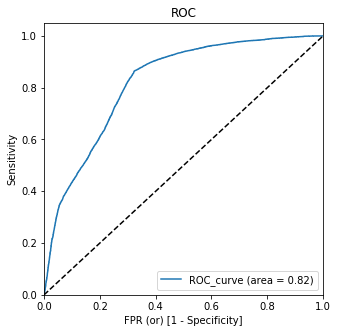

In [103]:
# Plotting ROC (Receiver Operating Characteristic) curve

def plot_ROC(actual, proba):
    fpr, tpr, thresholds = metrics.roc_curve( actual, proba,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual, proba)
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC_curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR (or) [1 - Specificity]')
    plt.ylabel('Sensitivity')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()
    return None
fpr, tpr, thresholds = metrics.roc_curve(y_logreg_train_pred.cust_churned,y_logreg_train_pred.churn_probability, drop_intermediate = False )
plot_ROC(y_logreg_train_pred.cust_churned,y_logreg_train_pred.churn_probability)

The ROC curve is having good amount of the area i.e 0.82

In [104]:
# Creating columns with different probabilities

numbers = [float(x)/10 for x in range(10)]
for n in numbers:
    y_logreg_train_pred[n]= y_logreg_train_pred.churn_probability.map(lambda x: 1 if x > n else 0)
y_logreg_train_pred.head()

,cust_churned,churn_probability,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.414547,1,1,1,1,1,0,0,0,0,0
1,0,0.193676,1,1,0,0,0,0,0,0,0,0
2,0,0.210903,1,1,1,0,0,0,0,0,0,0
3,0,0.000060,1,0,0,0,0,0,0,0,0,0
4,0,0.049353,1,0,0,0,0,0,0,0,0,0


In [105]:
# Calculating Sensitivity, Specificity and Accuracy at various Probability cutoffs
# Importing confusion_matrix from sklearn

cutoff_prob_df = pd.DataFrame(columns = ['Probability', 'Sensitivity','Specificity','Accuracy'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cfm = metrics.confusion_matrix(y_logreg_train_pred.cust_churned, y_logreg_train_pred[i] )
    total=sum(sum(cfm))
    Sensitivity = cfm[1,1]/(cfm[1,0]+cfm[1,1])
    Specificity = cfm[0,0]/(cfm[0,0]+cfm[0,1])
    Accuracy = (cfm[0,0]+cfm[1,1])/total    
    cutoff_prob_df.loc[i] = [i, Sensitivity, Specificity, Accuracy]
cutoff_prob_df

,Probability,Sensitivity,Specificity,Accuracy
0.0,0.0,1.000000,0.000000,0.500000
0.1,0.1,0.980993,0.268838,0.624916
0.2,0.2,0.966596,0.369051,0.667823
0.3,0.3,0.949091,0.458232,0.703662
0.4,0.4,0.925320,0.543425,0.734373
0.5,0.5,0.889223,0.634264,0.761743
0.6,0.6,0.695686,0.758040,0.726863
0.7,0.7,0.424103,0.905640,0.664871
0.8,0.8,0.120307,0.983376,0.551841
0.9,0.9,0.029572,0.995184,0.512378


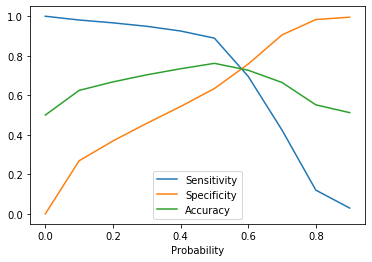

In [106]:
# Plotting Accuracy, Sensitivity and Specificity for various probabilities.
cutoff_prob_df.plot.line(x='Probability', y=['Sensitivity','Specificity','Accuracy'])
plt.show()

In [107]:
ct_val = 0.57
y_logreg_train_pred['predicted_outcome']=y_logreg_train_pred.churn_probability.map(lambda x: 1 if x > ct_val else 0)
y_logreg_train_pred.head(10)

,cust_churned,churn_probability,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted_outcome
0,0,0.414547,1,1,1,1,1,0,0,0,0,0,0
1,0,0.193676,1,1,0,0,0,0,0,0,0,0,0
2,0,0.210903,1,1,1,0,0,0,0,0,0,0,0
3,0,0.000060,1,0,0,0,0,0,0,0,0,0,0
4,0,0.049353,1,0,0,0,0,0,0,0,0,0,0
5,0,0.587610,1,1,1,1,1,1,0,0,0,0,1
6,0,0.055793,1,0,0,0,0,0,0,0,0,0,0
7,0,0.081252,1,0,0,0,0,0,0,0,0,0,0
8,0,0.597761,1,1,1,1,1,1,0,0,0,0,1
9,0,0.247561,1,1,1,0,0,0,0,0,0,0,0


In [108]:
# Finding Confusion matrix
confusion_matrix_train_1 = metrics.confusion_matrix(y_logreg_train_pred.cust_churned,y_logreg_train_pred.predicted_outcome)
confusion_matrix_train_1

array([[13782,  5527],
       [ 3956, 15353]], dtype=int64)

In [109]:
TN = confusion_matrix_train_1[0,0] # True Negatives
FP = confusion_matrix_train_1[0,1] # False Positives
FN = confusion_matrix_train_1[1,0] # False Negatives
TP = confusion_matrix_train_1[1,1] # True Positives

In [110]:
## Overall Accuracy of train model in percentage
print("\n Logistic Regression - Accuracy % for Train: ", round(metrics.accuracy_score(y_logreg_train_pred.cust_churned, y_logreg_train_pred.predicted_outcome)*100,3))



 Logistic Regression - Accuracy % for Train:  75.444


In [111]:
print("Sensitivity for Train:",round(TP / float(TP+FN)*100,2))
print("Specificity for Train:",round(TN / float(TN+FP)*100,2))
print('False Positive Rate for Train: ', round(FP/ float(TN+FP)*100,2)) # predicting churn when user has not churned
print ('Positive Predictive Value for Train: ', round(TP / float(TP+FP)*100,2))
print ('Negative Predictive Value for Train: ', round(TN / float(TN+FN)*100,2))
print("Recall_Score for Train:", round(recall_score(y_logreg_train_pred.cust_churned, y_logreg_train_pred.predicted_outcome)*100,2))

Sensitivity: 79.51
Specificity: 71.38
False Positive Rate :  28.62
Positive Predictive Value :  73.53
Negative Predictive Value :  77.7
Recall_Score: 79.51


In [112]:
# Applying Logistic Regression on the test dataset
logreg_test = LogisticRegression(class_weight='balanced',solver='liblinear', random_state=42)
logreg_test.fit(X_test, y_test)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [113]:
# Making predictions on Test data
y_logreg_pred_test = logreg_test.predict(X_test)

In [114]:
# Deriving Confusion matrix for the test dataset

logreg_confusion_M_test = metrics.confusion_matrix(y_test,y_logreg_pred_test)
print('Confusion Matrix_Test: ', '\n')
print(logreg_confusion_M_test)

Confusion Matrix_Test:  

[[7027 1224]
 [ 111  639]]


In [115]:
#Overall Accuracy of test model in percentage

print("\n Logistic Regression - Accuracy in % : ", round(metrics.accuracy_score(y_test, y_logreg_pred_test)*100,4))


 Logistic Regression - Accuracy in % :  85.1683


In [116]:
# Assigning each element in Confusion_Matrix to variables
TN = logreg_confusion_M_test[0,0] # True Negatives
FP = logreg_confusion_M_test[0,1] # False Positives
FN = logreg_confusion_M_test[1,0] # False Negatives
TP = logreg_confusion_M_test[1,1] # True Positives

In [117]:
print("Sensitivity:",round(TP / float(TP+FN)*100,2))
print("Specificity:",round(TN / float(TN+FP)*100,2))
print('False Positive Rate : ', round(FP/ float(TN+FP)*100,2)) # predicting churn when user has not churned
print ('Positive Predictive Value : ', round(TP / float(TP+FP)*100,2))
print ('Negative Predictive Value : ', round(TN / float(TN+FN)*100,2))
print("Recall_Score:", round(recall_score(y_test, y_logreg_pred_test)*100,2))

Sensitivity: 85.2
Specificity: 85.17
False Positive Rate :  14.83
Positive Predictive Value :  34.3
Negative Predictive Value :  98.44
Recall_Score: 85.2


In [118]:
y_train_1

,cust_churned,churn_probability,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted_outcome
0,0,0.414547,1,1,1,1,1,0,0,0,0,0,0
1,0,0.193676,1,1,0,0,0,0,0,0,0,0,0
2,0,0.210903,1,1,1,0,0,0,0,0,0,0,0
3,0,0.000060,1,0,0,0,0,0,0,0,0,0,0
4,0,0.049353,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38613,1,0.847419,1,1,1,1,1,1,1,1,1,0,1
38614,1,0.600417,1,1,1,1,1,1,1,0,0,0,1
38615,1,0.663736,1,1,1,1,1,1,1,0,0,0,1
38616,1,0.658867,1,1,1,1,1,1,1,0,0,0,1


In [119]:
y_train_1.shape

(38618, 13)

In [120]:
y_train_1 = pd.DataFrame(y_train_1, columns=['cust_churned'])

In [121]:
y_train_1.shape

(38618, 1)

## Decision Trees without PCA"

In [122]:
from sklearn import preprocessing


# encode categorical variables using Label Encoder

# select all categorical variables
df_categorical = data_HVC.select_dtypes(include=['object'])
df_categorical.head()

""
0
7
8
21
23


In [123]:
data_HVC.info(verbose =1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 154 columns):
 #   Column                Dtype  
---  ------                -----  
 0   arpu_6                float64
 1   arpu_7                float64
 2   arpu_8                float64
 3   onnet_mou_6           float64
 4   onnet_mou_7           float64
 5   onnet_mou_8           float64
 6   offnet_mou_6          float64
 7   offnet_mou_7          float64
 8   offnet_mou_8          float64
 9   roam_ic_mou_6         float64
 10  roam_ic_mou_7         float64
 11  roam_ic_mou_8         float64
 12  roam_og_mou_6         float64
 13  roam_og_mou_7         float64
 14  roam_og_mou_8         float64
 15  loc_og_t2t_mou_6      float64
 16  loc_og_t2t_mou_7      float64
 17  loc_og_t2t_mou_8      float64
 18  loc_og_t2m_mou_6      float64
 19  loc_og_t2m_mou_7      float64
 20  loc_og_t2m_mou_8      float64
 21  loc_og_t2f_mou_6      float64
 22  loc_og_t2f_mou_7      float64
 23  loc_og_t2f

In [124]:
print(data_HVC['night_pck_user_6'].value_counts())
print(data_HVC['night_pck_user_7'].value_counts())
print(data_HVC['night_pck_user_8'].value_counts())
print(data_HVC['fb_user_6'].value_counts())
print(data_HVC['fb_user_7'].value_counts())
print(data_HVC['fb_user_8'].value_counts())

 0.0    16349
-1.0    13245
 1.0      407
Name: night_pck_user_6, dtype: int64
 0.0    16682
-1.0    12944
 1.0      375
Name: night_pck_user_7, dtype: int64
 0.0    15612
-1.0    14048
 1.0      341
Name: night_pck_user_8, dtype: int64
 1.0    15525
-1.0    13245
 0.0     1231
Name: fb_user_6, dtype: int64
 1.0    15722
-1.0    12944
 0.0     1335
Name: fb_user_7, dtype: int64
 1.0    14313
-1.0    14048
 0.0     1640
Name: fb_user_8, dtype: int64


In [125]:
cat_cols = ['fb_user_6','fb_user_7', 'fb_user_8','night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']
data_HVC[cat_cols] = data_HVC[cat_cols].astype(object)

In [126]:
from sklearn import preprocessing


# encode categorical variables using Label Encoder

# select all categorical variables
data_HVC_categorical = data_HVC.select_dtypes(include=['object'])
data_HVC_categorical.head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8
0,0,0,0,1,1,1
7,-1,-1,-1,-1,-1,-1
8,-1,0,0,-1,1,1
21,-1,-1,-1,-1,-1,-1
23,-1,0,0,-1,1,1


In [127]:
# apply Label encoder to df_categorical

le = preprocessing.LabelEncoder()
data_HVC_categorical = data_HVC_categorical.apply(le.fit_transform)
data_HVC_categorical.head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8
0,1,1,1,2,2,2
7,0,0,0,0,0,0
8,0,1,1,0,2,2
21,0,0,0,0,0,0
23,0,1,1,0,2,2


In [128]:
# concat df_categorical with original df
data_HVC = data_HVC.drop(data_HVC_categorical.columns, axis=1)
data_HVC = pd.concat([data_HVC, data_HVC_categorical], axis=1)
data_HVC.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_recharge_amt_6_7,cust_churned,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8
0,197.385,214.816,213.803,34.31,32.33,0.00,96.31,91.735,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.91,11.61,0.00,41.03,40.43,0.00,0.00,0.00,0.00,0.0,0.0,0.00,65.11,63.685,0.00,0.00,0.00,0.00,3.95,3.635,0.00,0.00,0.00,0.00,11.64,11.09,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,15.69,15.74,0.16,56.49,57.08,4.13,0.88,0.93,1.15,92.16,92.55,5.44,0.00,0.00,0.00,2.03,2.04,0.00,0.00,0.00,0.00,5.89,5.96,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,559.0,1,1,1,1,2,2,2
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.160,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.910,255.79,4.30,23.29,12.01,49.89,31.760,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1490,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,1185.0,1,0,0,0,0,0,0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.630,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.180,63.04,116.56,133.43,22.58,13.69,10.040,75.69,0.00,0.00,0.00,130.26,143.48,98.

In [129]:
data_HVC[['cust_churned']]

,cust_churned
0,1
7,1
8,0
21,0
23,0
...,...
99981,0
99984,0
99986,0
99988,0


In [130]:
# convert target variable income to categorical
data_HVC['cust_churned'] = data_HVC['cust_churned'].astype('category')

In [131]:
data_HVC['cust_churned'].value_counts()

0    27560
1     2441
Name: cust_churned, dtype: int64

Now all the categorical variables are suitably encoded. Let's build the model.

### Model Building and Evaluation

In [132]:
#Building tree model with default parameters, and followed by tuning the hyper parameters
# Importing train-test-split 
from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = data_HVC.drop('cust_churned',axis=1)

# Putting response variable to y
y = data_HVC['cust_churned']

In [133]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_recharge_amt_6_7,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8
94416,533.293,763.238,210.306,679.21,1193.13,202.26,32.08,33.99,45.99,0.00,0.0,0.00,0.00,0.0,0.00,20.61,27.98,12.64,32.08,30.91,32.16,0.00,0.00,0.00,0.00,0.00,0.00,52.69,58.89,44.81,658.59,1165.14,189.61,0.00,3.08,13.83,0.00,0.0,0.00,658.59,1168.23,203.44,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,711.29,1227.13,248.26,4.23,6.24,8.31,30.21,8.54,47.84,0.08,0.00,4.88,34.53,14.79,61.04,57.13,0.39,1.89,0.61,0.00,0.00,0.00,0.0,0.0,57.74,0.39,1.89,92.28,15.19,62.94,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,30,35,14,641,846,274,30,36,30,30,30,30,3.0,1.0,2.0,17.0,17.0,17.0,3.0,1.0,2.0,0.0,0.0,0.0,51.0,17.0,34.0,150.54,35.94,96.00,0.0,0.00,0.0,0.0,0.00,0.0,0.40,0.40,23.90,0,0,0,3,1,2,0,0,0,0,0,0,724,0.0,0.00,0.0,0.00,828.5,1,1,1,2,1,2
98895,206.089,356.471,221.250,53.04,66.23,33.98,27.13,30.01,4.08,0.00,0.0,0.00,0.00,0.0,0.00,53.04,66.23,33.98,20.64,21.31,4.08,0.00,0.40,0.00,6.48,7.34,0.00,73.69,87.94,38.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,7.76,12.08,1.48,2.21,0.0,0.0,83.68,100.03,39.54,79.64,52.58,24.91,92.93,172.41,62.08,0.00,0.00,4.59,172.58,224.99,91.59,0.00,0.00,0.00,0.00,2.43,0.00,0.00,0.0,0.0,0.00,2.43,0.00,173.11,227.43,91.59,0.0,0.00,0.0,0.0,0.0,0.0,0.53,0.0,0.0,17,28,14,234,407,252,30,30,30,10,0,17,8.0,12.0,5.0,25.0,25.0,25.0,8.0,12.0,9.0,0.0,0.0,0.0,189.0,252.0,177.0,348.99,270.69,96.00,0.0,345.83,35.6,0.0,10.26,0.0,8.91,36.69,35.81,0,0,0,8,12,9,0,0,0,0,0,0,918,41.4,347.49,0.0,4.45,2588.5,1,1,1,2,2,2
55936,444.652,185.014,37.640,22.36,11.64,0.00,133.71,45.74,0.00,27.38,0.0,0.00,31.39,0.0,0.00,0.46,0.00,0.00,0.85,2.00,0.00,0.00,1.50,0.00,13.38,24.16,0.00,1.31,3.50,0.00,21.89,11.64,0.00,19.34,17.48,0.00,3.28,0.0,0.00,44.53,29.13,0.00,0.0,0.0,0.0,78.83,24.81,0.00,0.00,0.0,0.0,124.68,57.44,0.00,0.00,11.79,5.89,3.26,3.28,1.58,0.00,1.

In [134]:
# Checking the class imbalance in train and test data for target variable

y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()

print("Imbalance in the Train Data : ", y_train_imb)
print("Imbalance in the Test Data : ", y_test_imb)

Imbalance in the Train Data :  0.08847768620743275
Imbalance in the Test Data :  0.08878674247006169


In [135]:
# Applying SMOTE(Synthetic Minority Oversampling Technique) on the train dataset for handing the class imbalance in the data
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train_1,y_train_1 = smt.fit_sample(X_train,y_train)

print("X_train_1 Shape", X_train_1.shape)
print("y_train_1 Shape", y_train_1.shape)

imbalance = (y_train_1 != 0).sum()/(y_train_1 == 0).sum()
print("Imbalance in the Train Data : ",imbalance)

X_train_1 Shape (38586, 153)
y_train_1 Shape (38586,)
Imbalance in the Train Data :  1.0


### Decision Tree

In [136]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train_1, y_train_1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [137]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      8267
           1       0.41      0.73      0.52       734

    accuracy                           0.89      9001
   macro avg       0.69      0.82      0.73      9001
weighted avg       0.93      0.89      0.91      9001



In [138]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print("The accuracy score is {0}".format(100*accuracy_score(y_test,y_pred_default)))
print("The recall score is {0}".format(100*recall_score(y_test,y_pred_default)))

[[7494  773]
 [ 199  535]]
The accuracy score is 89.20119986668148
The recall score is 72.88828337874659


### Plotting the Decision Tree

In [139]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

# Putting features
features = list(data_HVC.columns[1:])
features

['arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_6',


In [140]:
#import os
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'

In [ ]:
# plotting tree with max_depth=5
#dot_data = StringIO()  
#export_graphviz(dt_default, out_file=dot_data,
#                feature_names=features, filled=True,rounded=True)

#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())

## Grid Search to Find Optimal Hyperparameters
We can now use GridSearchCV to find multiple optimal hyperparameters together. Note that this time, we'll also specify the criterion (gini/entropy or IG).

##### we are using the balanced dataset to train the data and we do the testing on original X_test (which is imbalanced)

In [147]:
# GridSearchCV to find optimal parameters
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 3),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, scoring = 'recall')

# Fit the grid search to the data
grid_search.fit(X_train_1,y_train_1)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  7.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                   

In [148]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.334067,0.134765,0.011701,0.002525,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.791915,0.886210,0.892691,0.895828,0.888831,0.871095,0.039726,29
1,2.469536,0.170190,0.011106,0.002654,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.791915,0.886210,0.892691,0.895828,0.888831,0.871095,0.039726,29
2,2.108404,0.118853,0.010762,0.006334,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.799948,0.883618,0.887247,0.890386,0.888831,0.870006,0.035101,32
3,2.497304,0.089283,0.010179,0.001311,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.799948,0.883618,0.887506,0.890386,0.888831,0.870058,0.035127,31
4,3.615036,0.231474,0.011234,0.004195,entropy,8,50,50,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.827416,0.920943,0.923795,0.935994,0.922778,0.906185,0.039740,11
5,3.324463,0.101459,0.006981,0.003678,entropy,8,50,100,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.827416,0.920943,0.923795,0.935994,0.922778,0.906185,0.039740,11
6,3.208542,0.173895,0.011543,0.003421,entropy,8,100,50,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.824566,0.911612,0.920684,0.926665,0.922778,0.901261,0.038665,23
7,3.175732,0.216570,0.011768,0.006052,entropy,8,100,100,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.824566,0.911612,0.920684,0.926665,0.922778,0.901261,0.038665,23
8,3.769262,0.349888,0.008111,0.004960,entropy,11,50,50,"{'criterion': 'entropy', 'max_depth': 11, 'min...",0.833117,0.941420,0.929238,0.940658,0.934957,0.915878,0.041613,2
9,3.957322,0.381750,0.011035,0.005789,entropy,11,50,100,"{'criterion': 'entropy', 'max_depth': 11, 'min...",0.833117,0.941420,0.929238,0.941176,0.934957,0.915982,0.041675,1


In [149]:
# printing the optimal accuracy score and hyperparameters
print("best recall", grid_search.best_score_)
print(grid_search.best_estimator_)

best recall 0.9159818947070336
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=11, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


**Running the model with best parameters obtained from grid search.**

In [150]:
# model with optimal hyperparameters
HPT_entropy = DecisionTreeClassifier(criterion = "entropy",
                                  max_depth=11, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)
HPT_entropy.fit(X_train_1, y_train_1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=11, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [151]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score

# Making predictions
y_pred_default = HPT_entropy.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      8267
           1       0.45      0.68      0.54       734

    accuracy                           0.90      9001
   macro avg       0.71      0.80      0.74      9001
weighted avg       0.93      0.90      0.91      9001



In [152]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print("The accuracy score is {0}".format(100*accuracy_score(y_test,y_pred_default)))
print("The recall score is {0}".format(100*recall_score(y_test,y_pred_default)))

[[7646  621]
 [ 236  498]]
The accuracy score is 90.4788356849239
The recall score is 67.8474114441417


##### Using the imbalanced dataset to train the model, Decision trees frequently perform well on imbalanced data. They work by learning a hierarchy of if/else questions and this can force both classes to be addressed.

In [153]:
# GridSearchCV to find optimal parameters
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 3),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree2 = DecisionTreeClassifier()
grid_search2 = GridSearchCV(estimator = dtree2, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, scoring = 'recall', return_train_score=True)

# Fit the grid search to the data
grid_search2.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  3.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                   

In [154]:
# cv results
cv_results = pd.DataFrame(grid_search2.cv_results_)
cv_results[['mean_test_score','mean_train_score' ]][cv_results['rank_test_score']==1]

,mean_test_score,mean_train_score
6,0.497915,0.528851
7,0.497915,0.528851
10,0.497915,0.528851
11,0.497915,0.528851
14,0.497915,0.528851
15,0.497915,0.528851


In [155]:
# printing the optimal accuracy score and hyperparameters
print("best recall", grid_search2.best_score_)
print(grid_search2.best_estimator_)

best recall 0.49791463017269466
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


#### Running the model with the best parameters 

In [156]:
# model with optimal hyperparameters
HPT2 = DecisionTreeClassifier(criterion = "entropy",
                                  max_depth=8, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)
HPT2.fit(X_train_1, y_train_1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [157]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score

# Making predictions
y_pred_default2 = HPT2.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default2))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      8267
           1       0.43      0.68      0.53       734

    accuracy                           0.90      9001
   macro avg       0.70      0.80      0.74      9001
weighted avg       0.93      0.90      0.91      9001



In [158]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default2))
print("The accuracy score is {0}".format(100*accuracy_score(y_test,y_pred_default2)))
print("The recall score is {0}".format(100*recall_score(y_test,y_pred_default2)))

[[7605  662]
 [ 233  501]]
The accuracy score is 90.05666037106988
The recall score is 68.25613079019074


Observations:
    1. The best recall score acheived in the Decision trees as follows:
        a. Default Decision tree: 73.6
        b. Hyper parameter tuning on balanced dataset:66.9
        c. Hyper parameter tuning on imbalanced dataset:70.8
    2. With the above observations, we can consider the model being built on the imbalanced dataset can be taken as the best one from the decision trees as Decsion trees are foreced to make if/else coditions while getting trained on training set

## Random Forest

In [159]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [160]:
# fit
rfc.fit(X_train_1,y_train_1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [161]:
# Making predictions
predictions = rfc.predict(X_test)

In [162]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      8267
           1       0.63      0.57      0.60       734

    accuracy                           0.94      9001
   macro avg       0.80      0.77      0.78      9001
weighted avg       0.94      0.94      0.94      9001



#### Hyper Parameter Tuning for Random Forest

In [163]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [164]:
# Fit the grid search to the data
grid_search.fit(X_train_1, y_train_1)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 17.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [165]:
# printing the optimal accuracy score and hyperparameters
print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)

We can get recall of 0.9128958689680194 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


**Fitting the final model with the best parameters obtained from grid search.**

In [166]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [167]:
# fit
rfc.fit(X_train_1,y_train_1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [168]:
# predict
predictions = rfc.predict(X_test)

In [169]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [170]:
print(confusion_matrix(y_test,predictions))
# Printing classification report
print(classification_report(y_test, predictions))

[[7644  623]
 [ 219  515]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.95      8267
           1       0.45      0.70      0.55       734

    accuracy                           0.91      9001
   macro avg       0.71      0.81      0.75      9001
weighted avg       0.93      0.91      0.92      9001



Observations:
1. The best recall score acheived in the Decision trees as follows:
    - Default Decision tree: 58%
    - Hyper parameter tuning on balanced dataset: 70%
2. With the above observations, we can consider the model being built on the balanced dataset can be taken as the best one from the Random forest

## Principal Component Analysis (PCA)

In [171]:
y_train_1 = pd.DataFrame(y_train_1, columns=['cust_churned'])

In [172]:
y_train_1.shape

(38586, 1)

In [173]:
X_train_1.shape

(38586, 153)

In [174]:
y_train_1

,cust_churned
0,0
1,0
2,0
3,0
4,0
...,...
38581,1
38582,1
38583,1
38584,1


In [175]:
#Importing PCA module and applying PCA to dataframe

from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(X_train_1)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [176]:
#Checking the components
#First component of the first vector obtained from pca.components_
pca.components_

array([[ 1.43765532e-01,  1.51267448e-01,  1.03458660e-01, ...,
        -2.30208793e-04, -2.06921926e-04, -1.19295641e-04],
       [ 1.11883853e-01,  1.38603728e-01,  1.27051629e-01, ...,
         1.98942560e-04,  2.03154723e-04,  1.96754606e-04],
       [ 1.63931672e-02,  1.32505162e-01,  2.10367100e-01, ...,
        -6.93952545e-05, -6.05233866e-06,  9.66676554e-05],
       ...,
       [-0.00000000e+00,  6.19141087e-19,  5.20045717e-19, ...,
        -4.46244712e-16, -4.47894861e-16, -2.23109536e-16],
       [ 0.00000000e+00,  4.67921776e-19, -3.75539429e-18, ...,
        -3.32497772e-16,  3.38440415e-17,  1.37105056e-16],
       [ 0.00000000e+00, -5.68081085e-20,  4.92143702e-18, ...,
        -2.73783980e-15, -2.21992058e-15,  1.13351395e-15]])

In [177]:
#Variance explained by First Principal Component
pca.explained_variance_ratio_

array([2.61505207e-01, 1.78916672e-01, 9.07819472e-02, 7.41386356e-02,
       6.32473397e-02, 5.31652425e-02, 4.36379235e-02, 3.13659613e-02,
       2.70250577e-02, 2.44921991e-02, 2.00669000e-02, 1.30886885e-02,
       1.19947499e-02, 1.00962932e-02, 9.21349490e-03, 8.74067972e-03,
       7.45037423e-03, 5.93366270e-03, 5.26449221e-03, 4.95737664e-03,
       4.22923024e-03, 3.93543153e-03, 3.48315441e-03, 3.15030569e-03,
       3.05263188e-03, 2.94364261e-03, 2.73119414e-03, 2.56354828e-03,
       2.28731222e-03, 2.12827983e-03, 2.01951528e-03, 1.65340372e-03,
       1.56960689e-03, 1.42981220e-03, 1.11961965e-03, 1.10084534e-03,
       1.00614681e-03, 9.96706655e-04, 9.37087649e-04, 8.77157109e-04,
       8.61574882e-04, 7.95732240e-04, 7.26929761e-04, 6.62363717e-04,
       6.25761474e-04, 5.78978651e-04, 5.54026960e-04, 5.28576566e-04,
       4.88877645e-04, 4.77390886e-04, 4.59074117e-04, 4.22148695e-04,
       4.18997997e-04, 3.60344749e-04, 3.12552665e-04, 2.85934061e-04,
      

In [178]:
var_cumsum = np.cumsum(pca.explained_variance_ratio_)

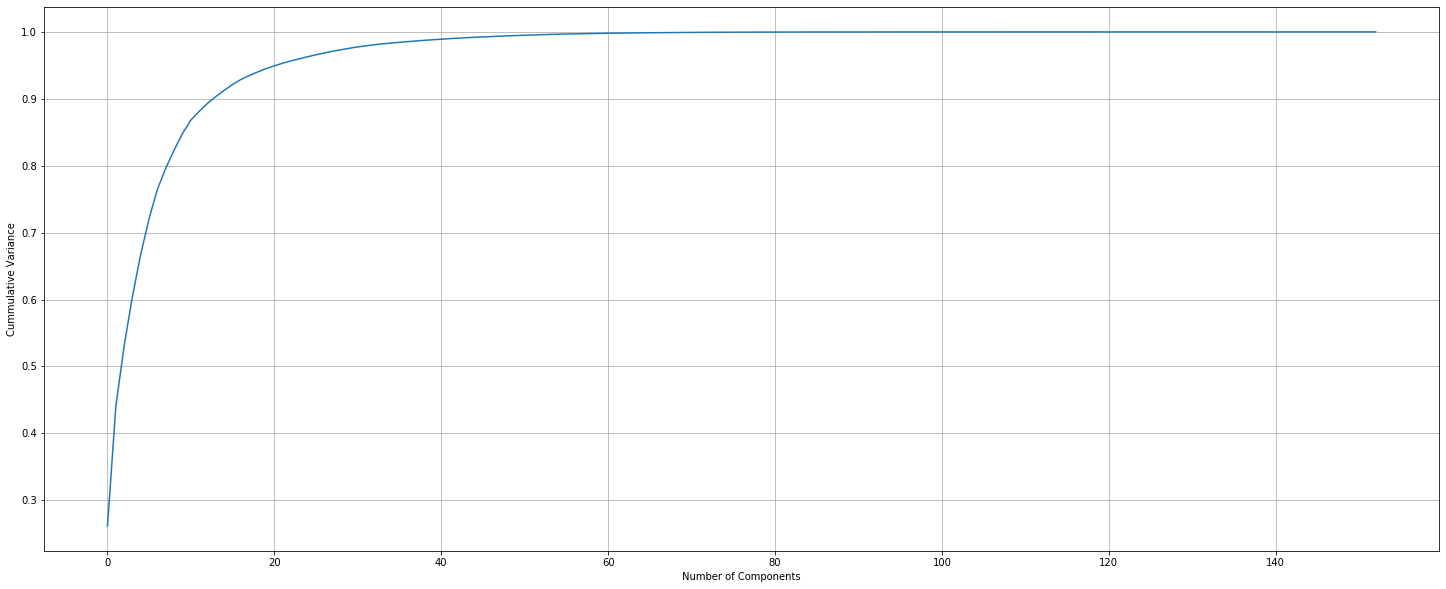

In [179]:
#Plotting the scree plot to arrive at the number of components

%matplotlib inline
fig = plt.figure(figsize = (25,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cummulative Variance')
plt.grid()
plt.show()

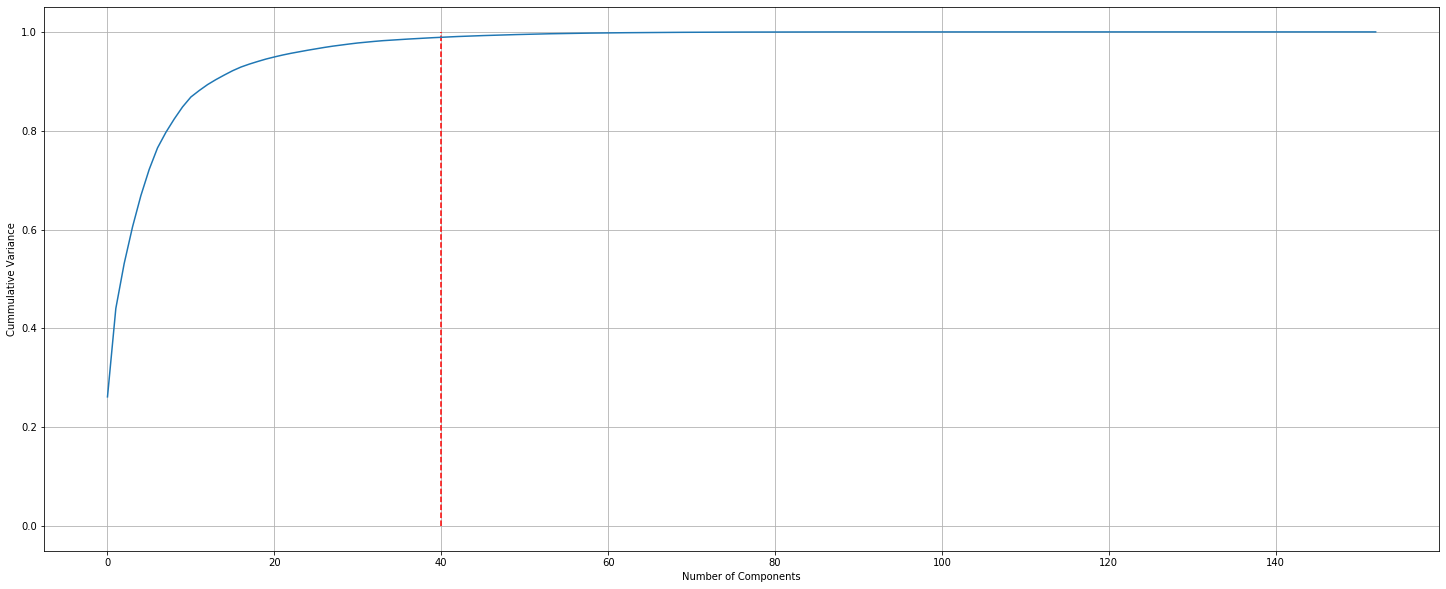

In [180]:
#Plotting the scree plot to arrive at the number of components

%matplotlib inline
fig = plt.figure(figsize = (25,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=40, ymax=1, ymin=0, colors="r", linestyles="--")
plt.xlabel('Number of Components')
plt.ylabel('Cummulative Variance')
plt.grid()
plt.show()

About 40 components are able to describe almost 95% of variance in the data

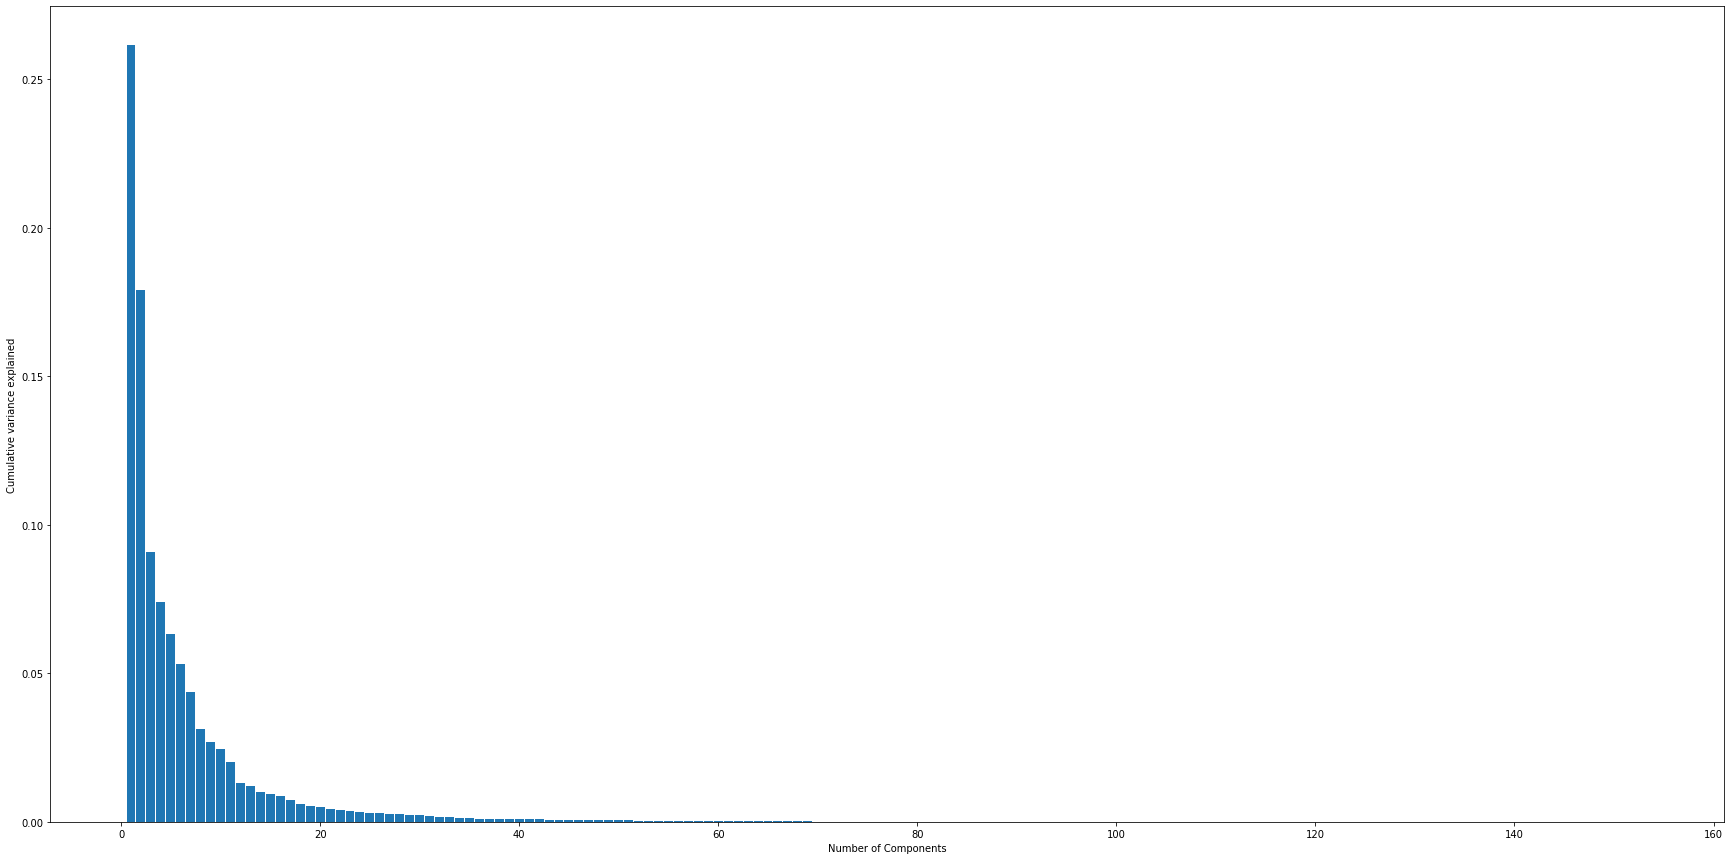

In [181]:
fig = plt.figure(figsize=[30,15])
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_ , width = 0.9)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative variance explained")
plt.savefig("SCREEPLOT",bbox_inches='tight')
plt.show()

In [182]:
# Performing the dimensionality reduction - incremental PCA
# Importing necessary modules to perform Incremental PCA

from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components= 40)

In [183]:
X_train_pca = pca_final.fit_transform(X_train_1)

In [184]:
X_train_pca.shape

(38586, 40)

In [185]:
X_train_pca

array([[  806.92388893,  -628.97425424,  -760.04801418, ...,
          -40.08280368,   -16.91577576,    28.59715952],
       [-1377.68159632,   763.7049334 ,  -358.12253882, ...,
          -21.95528448,    14.68203575,    -7.53331716],
       [-1395.47061123,  -618.03968414,  -733.9721265 , ...,
          -67.61625336,  -177.41420943,    32.86821821],
       ...,
       [-1283.0193123 ,  -780.45025243,   708.48635308, ...,
            9.90164974,    22.75334183,    61.29492505],
       [-1440.32340462,   784.9397357 ,  -941.0735293 , ...,
          -30.45813496,   -16.37780653,     6.71372171],
       [ 1014.64185012,  -684.89069157,  -139.70327409, ...,
          -53.78651882,   -27.21877043,   -18.63957653]])

In [186]:
# Getting the minimum and maximum value from the correlation matrix.

corr_matrix = np.corrcoef(X_train_pca.transpose())
mask = np.ones(corr_matrix.shape, dtype=bool)
np.fill_diagonal(mask, 0)
max_value = corr_matrix[mask].max()
min_value = corr_matrix[mask].min()

print('Max: ', max_value, ' , Min: ', min_value )

Max:  0.012733675173357295  , Min:  -0.005609518617502692


Observation:
Previously before the PCA when we ran the correlation matrix, we saw 70 % Correlation in the data features, but we can see that the correlation is bieng absent in the Dataset after PCA is performed

In [187]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(9001, 40)

In [188]:
init_list = list(data_HVC.columns)
print(type(init_list))
print(len(init_list))

<class 'list'>
154


In [189]:
pcs_nums= pca_final.components_.shape[0]
imp_PCA_features = [np.abs(pca_final.components_[i]).argmax() for i in range(pcs_nums)]
imp_PCA_features_Cols = [init_list[imp_PCA_features[i]] for i in range(pcs_nums)]
print(len(imp_PCA_features_Cols))
imp_PCA_features_Cols

40


['total_og_mou_7',
 'avg_recharge_amt_6_7',
 'aon',
 'offnet_mou_6',
 'total_og_mou_6',
 'avg_recharge_amt_6_7',
 'aon',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'vol_3g_mb_6',
 'total_ic_mou_6',
 'aug_vbc_3g',
 'std_og_t2t_mou_6',
 'total_rech_amt_6',
 'vol_2g_mb_6',
 'loc_og_t2m_mou_6',
 'total_rech_amt_7',
 'vol_3g_mb_8',
 'std_ic_mou_7',
 'onnet_mou_8',
 'max_rech_amt_7',
 'max_rech_amt_7',
 'roam_og_mou_6',
 'vol_2g_mb_7',
 'total_ic_mou_6',
 'vol_2g_mb_6',
 'jun_vbc_3g',
 'loc_ic_t2t_mou_6',
 'jul_vbc_3g',
 'vol_3g_mb_8',
 'arpu_8',
 'arpu_7',
 'total_rech_amt_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'av_rech_amt_data_6',
 'arpu_3g_8',
 'av_rech_amt_data_7',
 'total_ic_mou_8',
 'isd_ic_mou_6']

we can notice that the correlations are very close to 0 and multicollineratity is greatly reduced.

In [191]:
pc = pd.DataFrame(X_train_pca)
X_train_pca_df = pd.DataFrame({'pc1':pc[0],'pc2': pc[1],'pc3':pc[2],'pc4':pc[3],'pc5':pc[4],'pc6': pc[5],'pc7':pc[6],'pc8':pc[7],
                      'pc9':pc[8],'pc10': pc[9],'pc11':pc[10],'pc12':pc[11],'pc13':pc[12],'pc14': pc[13],'pc15':pc[14],
                       'pc16':pc[15],'pc17':pc[16],'pc18': pc[17],'pc19':pc[18],'pc20':pc[19],'pc21':pc[20],'pc22': pc[21],
                       'pc23':pc[22],'pc24':pc[23],'pc25':pc[24],'pc26': pc[25],'pc27':pc[26],'pc28':pc[27],'pc29':pc[28],
                      'pc30':pc[29],'pc31': pc[30],'pc32':pc[31],'pc33':pc[32],'pc34':pc[33],'pc35': pc[34],'pc36':pc[35],
                       'pc37':pc[36],'pc38':pc[37],'pc39': pc[38],'pc40':pc[39]})

In [192]:
X_train_pca_df.shape

(38586, 40)

In [193]:
X_train_pca_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,pc25,pc26,pc27,pc28,pc29,pc30,pc31,pc32,pc33,pc34,pc35,pc36,pc37,pc38,pc39,pc40
0,806.923889,-628.974254,-760.048014,-1220.232319,51.915884,422.660821,154.443489,-13.659957,713.386080,407.745424,35.973433,58.419951,-171.750486,-2.878998,-32.244012,131.754013,-250.948933,29.100404,113.326012,-494.105520,-77.801101,-54.701391,-64.063173,-21.402737,7.963770,74.988856,41.423123,18.386241,85.144437,-20.329516,12.937337,98.636722,60.322062,-2.959171,54.070101,13.657590,16.525376,-40.082804,-16.915776,28.597160
1,-1377.681596,763.704933,-358.122539,30.700737,-30.475838,1131.728402,610.628684,-801.245197,-90.651007,-261.375277,43.918236,98.998641,-49.817252,-23.522920,-78.270802,-77.813582,88.905931,-36.425530,-55.822649,-39.205736,-104.586956,-40.698516,-18.911541,-38.363334,26.216957,-98.366179,-171.715517,-72.239166,137.104086,71.815484,0.011117,-35.690963,10.429098,17.739392,21.510623,-7.296942,-10.537492,-21.955284,14.682036,-7.533317
2,-1395.470611,-618.039684,-733.972126,214.019661,-150.088041,769.146541,-159.086148,-36.184128,-105.756481,29.470791,156.187845,90.447322,-130.272946,118.184765,365.948107,-57.657068,2.214361,-69.983131,471.625118,151.090604,13.623194,-182.174666,13.963187,-100.367147,-76.298960,91.242238,-84.894308,-25.280882,27.509624,-50.678184,26.843633,-94.761792,15.315844,80.688421,36.467464,-67.281812,-56.968178,-67.616253,-177.414209,32.868218
3,349.576778,-174.408467,1741.975507,523.589916,469.506491,-264.680740,-45.588220,-6.873142,-376.743227,-50.233343,63.337780,-191.216074,27.637250,168.045773,-36.161850,182.239109,-372.981403,2.755440,-61.953235,-20.106089,143.062046,446.721424,-185.665698,64.219200,121.604512,-121.445391,-335.824457,-147.569002,-310.262435,-42.707944,-69.713722,168.620094,-30.045762,151.257112,11.957130,-132.135803,62.004138,-27.424377,-0.390921,-54.932248
4,297.971413,-748.862662,152.451444,-789.531753,-689.757058,153.301350,180.142462,241.084712,-249.264764,-74.882520,-96.497657,-156.909434,36.678302,-81.843799,-136.653925,-17.159182,50.247170,-66.951329,18.342665,-166.751228,-42.664621,-93.521575,-22.898822,8.009706,-9.094202,-26.449993,-46.128485,30.363287,82.987154,-90.599083,-76.465041,-68.284255,-30.153651,36.891989,-34.772157,20.786330,35.258834,-4.687003,-41.433313,1.712863


In [194]:
#Checking Correlations among the components

corrmat = np.corrcoef(X_train_pca.transpose())
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("maximum corrleation:",corrmat_nodiag.max(), ", minimum correlation: ", corrmat_nodiag.min(),)

maximum corrleation: 0.012733675173357295 , minimum correlation:  -0.005609518617502692


we can notice that the correlations are very close to 0 and multicollineratity is greatly reduced.

In [195]:
X_test_pca =  pca_final.transform(X_test)
X_test_pca.shape

(9001, 40)

In [196]:
X_test_pca

array([[ -929.40633598,  -321.48991599,   413.00770498, ...,
          353.55244148,    -3.01991604,    95.09948159],
       [-1530.81342705,   174.26971669,   695.82555388, ...,
          -53.06979509,    42.67077223,   -43.68814665],
       [-1424.55639102,   -96.90257055,   -99.18642785, ...,
           30.522201  ,    -7.50919068,   -40.0968017 ],
       ...,
       [ -661.72361977,    69.29827082,  2230.61766093, ...,
           61.52070979,    44.41460311,    33.8482994 ],
       [-1706.78457088,  1015.52212472,  -919.71922772, ...,
           71.32230596,   -30.75753373,    -7.64018393],
       [ -866.89650651,    74.04634404,  -220.9250897 , ...,
           22.68573001,   -12.5841847 ,   -33.79265719]])

In [198]:
pc = pd.DataFrame(X_test_pca)
X_test_pca_df = pd.DataFrame({'pc1':pc[0],'pc2': pc[1],'pc3':pc[2],'pc4':pc[3],'pc5':pc[4],'pc6': pc[5],'pc7':pc[6],'pc8':pc[7],
                      'pc9':pc[8],'pc10': pc[9],'pc11':pc[10],'pc12':pc[11],'pc13':pc[12],'pc14': pc[13],'pc15':pc[14],
                       'pc16':pc[15],'pc17':pc[16],'pc18': pc[17],'pc19':pc[18],'pc20':pc[19],'pc21':pc[20],'pc22': pc[21],
                       'pc23':pc[22],'pc24':pc[23],'pc25':pc[24],'pc26': pc[25],'pc27':pc[26],'pc28':pc[27],'pc29':pc[28],
                      'pc30':pc[29],'pc31': pc[30],'pc32':pc[31],'pc33':pc[32],'pc34':pc[33],'pc35': pc[34],'pc36':pc[35],
                       'pc37':pc[36],'pc38':pc[37],'pc39': pc[38],'pc40':pc[39]})

In [199]:
X_test_pca_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,pc25,pc26,pc27,pc28,pc29,pc30,pc31,pc32,pc33,pc34,pc35,pc36,pc37,pc38,pc39,pc40
0,-929.406336,-321.489916,413.007705,-418.267173,-1002.389677,1013.314431,-376.192873,901.337393,-141.686557,-535.480795,-136.872777,-57.282071,649.055827,-1170.387420,-368.556810,96.076710,-17.745932,252.746011,93.724274,-144.624573,-229.901526,538.652953,-195.159600,-29.736560,72.216132,230.594392,-357.178790,-235.782447,-274.184685,61.985421,312.946915,-631.936828,311.989209,-361.663528,-248.551672,201.620521,-75.291715,353.552441,-3.019916,95.099482
1,-1530.813427,174.269717,695.825554,-217.366620,474.733882,-1534.497649,882.433922,398.066782,-424.615638,1224.373393,-73.978868,357.185574,-53.999286,-38.283952,-190.011466,-18.961075,269.139484,-179.566265,-21.826824,-79.014629,-78.115041,51.632257,-195.244761,-131.359349,-206.724724,-41.968872,172.853877,80.327665,-159.842613,-332.693023,72.666828,-20.769038,66.886681,24.028162,-65.220710,119.711249,-27.611916,-53.069795,42.670772,-43.688147
2,-1424.556391,-96.902571,-99.186428,-11.803340,-49.728435,-441.564435,-258.846068,239.588835,-294.031292,589.218614,-17.497533,303.908260,0.546234,-12.790945,-283.503124,91.817360,-37.286930,131.112049,-72.748114,1.576761,-34.471709,-204.119027,61.088830,21.590146,62.464794,-48.308441,-86.536769,-73.092179,-23.441105,175.889728,-95.878209,-40.081199,34.640765,73.197177,37.803763,-51.315420,-20.171947,30.522201,-7.509191,-40.096802
3,-1782.652538,354.731175,-871.602791,-102.299755,-364.425327,-450.226765,-402.177611,338.149717,-173.709510,318.113680,-74.270059,-97.166748,19.162370,-2.492351,240.478703,12.526497,-271.252810,258.689654,-87.460076,67.650100,69.455127,-115.875766,-110.176452,-355.762605,-141.814889,104.809268,83.965376,3.169137,-150.167675,326.063030,-173.644171,-26.050869,-75.667074,29.859045,-41.304405,130.744240,-57.110128,19.826944,4.515759,-13.376364
4,707.005117,-384.023004,251.554837,973.612504,116.132995,176.262821,-581.632566,47.088400,-246.121363,-98.353365,291.449996,-178.099367,-185.607388,14.465120,-107.535478,64.322608,-95.461273,5.987786,304.954991,-66.785706,-131.599652,-163.876539,-59.056454,70.896905,-82.714679,9.470293,-16.429588,64.995717,47.662069,-31.275825,49.426159,30.029274,143.198118,-58.163265,-139.336201,-95.025725,-162.303694,-38.318286,49.120176,15.929000


In [200]:
X_test_pca_df.shape

(9001, 40)

In [201]:
y_train_1.shape

(38586, 1)

## Logistic Regression on PCA

In [202]:
#Importing necessary packages from Logistic Regression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

In [203]:
X_train_pca.shape

(38586, 40)

In [204]:
y_train_1.shape

(38586, 1)

In [205]:
# Applying Logistic Regression on the train dataset
logreg_pca = LogisticRegression(class_weight='balanced',solver='liblinear', random_state=42)
logreg_pca.fit(X_train_pca, y_train_1)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [206]:
# Creating a dataframe with the actual conversion flag and the predicted probabilities
y_logreg_pca_train_prob = logreg_pca.predict_proba(X_train_pca)[:,1]
y_logreg_pca_train_prob

array([0.76488678, 0.46968928, 0.80498226, ..., 0.78438415, 0.61597302,
       0.76798254])

In [207]:
y_logreg_pca_train_prob[:15]

array([0.76488678, 0.46968928, 0.80498226, 0.06171782, 0.35630997,
       0.11243614, 0.58882899, 0.47242604, 0.10716099, 0.04944112,
       0.00162835, 0.01677093, 0.92126921, 0.16429281, 0.12950515])

In [208]:
# Assigning a coloumn to predicted probabilities in dataframe
# y_train_1 = pd.DataFrame(y_train_1)
y_logreg_pca_train_pred = pd.DataFrame(y_train_1)
y_logreg_pca_train_pred['churn_probability'] = y_logreg_pca_train_prob
print(y_logreg_pca_train_pred.shape)
y_logreg_pca_train_pred.head()

(38586, 2)


,cust_churned,churn_probability
0,0,0.764887
1,0,0.469689
2,0,0.804982
3,0,0.061718
4,0,0.356310


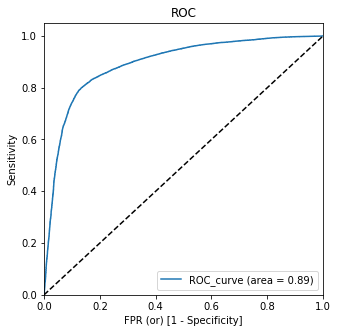

In [209]:
# Plotting ROC (Receiver Operating Characteristic) curve

def plot_ROC(actual, proba):
    fpr, tpr, thresholds = metrics.roc_curve( actual, proba,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual, proba)
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC_curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR (or) [1 - Specificity]')
    plt.ylabel('Sensitivity')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()
    return None
fpr, tpr, thresholds = metrics.roc_curve(y_logreg_pca_train_pred.cust_churned,y_logreg_pca_train_pred.churn_probability, drop_intermediate = False )
plot_ROC(y_logreg_pca_train_pred.cust_churned,y_logreg_pca_train_pred.churn_probability)

In [210]:
# creating columns with different probabilities 
numbers = [float(x)/10 for x in range(10)]
for n in numbers:
    y_logreg_pca_train_pred[n]= y_logreg_pca_train_pred.churn_probability.map(lambda x: 1 if x > n else 0)
y_logreg_pca_train_pred.head()

,cust_churned,churn_probability,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.764887,1,1,1,1,1,1,1,1,0,0
1,0,0.469689,1,1,1,1,1,0,0,0,0,0
2,0,0.804982,1,1,1,1,1,1,1,1,1,0
3,0,0.061718,1,0,0,0,0,0,0,0,0,0
4,0,0.356310,1,1,1,1,0,0,0,0,0,0


In [211]:
# Calculating Sensitivity, Specificity and Accuracy at various Probability cutoffs
# Importing confusion_matrix from sklearn
cutoff_prob_df = pd.DataFrame(columns = ['Probability', 'Sensitivity','Specificity','Accuracy'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cfm = metrics.confusion_matrix(y_logreg_pca_train_pred.cust_churned, y_logreg_pca_train_pred[i] )
    total=sum(sum(cfm))
    Sensitivity = cfm[1,1]/(cfm[1,0]+cfm[1,1])
    Specificity = cfm[0,0]/(cfm[0,0]+cfm[0,1])
    Accuracy = (cfm[0,0]+cfm[1,1])/total    
    cutoff_prob_df.loc[i] = [i, Sensitivity, Specificity, Accuracy]
cutoff_prob_df

,Probability,Sensitivity,Specificity,Accuracy
0.0,0.0,1.000000,0.000000,0.500000
0.1,0.1,0.974965,0.356088,0.665526
0.2,0.2,0.949360,0.514176,0.731768
0.3,0.3,0.918416,0.628933,0.773674
0.4,0.4,0.884984,0.721402,0.803193
0.5,0.5,0.845799,0.802364,0.824081
0.6,0.6,0.794019,0.870575,0.832297
0.7,0.7,0.698181,0.916032,0.807106
0.8,0.8,0.550251,0.948997,0.749624
0.9,0.9,0.240139,0.981392,0.610766


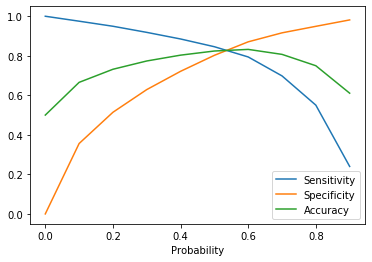

In [212]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_prob_df.plot.line(x='Probability', y=['Sensitivity','Specificity','Accuracy'])
plt.show()

In [213]:
cutoff_val = 0.55
y_logreg_pca_train_pred['predicted_outcome']=y_logreg_pca_train_pred.churn_probability.map(lambda x: 1 if x > cutoff_val else 0)
y_logreg_pca_train_pred.head(10)

,cust_churned,churn_probability,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted_outcome
0,0,0.764887,1,1,1,1,1,1,1,1,0,0,1
1,0,0.469689,1,1,1,1,1,0,0,0,0,0,0
2,0,0.804982,1,1,1,1,1,1,1,1,1,0,1
3,0,0.061718,1,0,0,0,0,0,0,0,0,0,0
4,0,0.356310,1,1,1,1,0,0,0,0,0,0,0
5,0,0.112436,1,1,0,0,0,0,0,0,0,0,0
6,0,0.588829,1,1,1,1,1,1,0,0,0,0,1
7,0,0.472426,1,1,1,1,1,0,0,0,0,0,0
8,0,0.107161,1,1,0,0,0,0,0,0,0,0,0
9,0,0.049441,1,0,0,0,0,0,0,0,0,0,0


In [214]:
confusion_matrix_train = metrics.confusion_matrix(y_logreg_pca_train_pred.cust_churned,y_logreg_pca_train_pred.predicted_outcome)
confusion_matrix_train

array([[16159,  3134],
       [ 3416, 15877]], dtype=int64)

In [215]:
TN = confusion_matrix_train[0,0] # True Negatives
FP = confusion_matrix_train[0,1] # False Positives
FN = confusion_matrix_train[1,0] # False Negatives
TP = confusion_matrix_train[1,1] # True Positives

In [216]:
## Overall Accuracy of train model in percentage
print("\n Logistic Regression with PCA - Accuracy % for Train: ", round(metrics.accuracy_score(y_logreg_pca_train_pred.cust_churned, y_logreg_pca_train_pred.predicted_outcome)*100,3))



 Logistic Regression with PCA - Accuracy % for Train:  83.025


In [217]:
print("Sensitivity:",round(TP / float(TP+FN)*100,2))
print("Specificity:",round(TN / float(TN+FP)*100,2))
print('False Positive Rate : ', round(FP/ float(TN+FP)*100,2)) # predicting churn when user has not churned
print ('Positive Predictive Value : ', round(TP / float(TP+FP)*100,2))
print ('Negative Predictive Value : ', round(TN / float(TN+FN)*100,2))
print("Recall_Score:", round(recall_score(y_train_1.cust_churned, y_logreg_pca_train_pred.predicted_outcome)*100,2))

Sensitivity: 82.29
Specificity: 83.76
False Positive Rate :  16.24
Positive Predictive Value :  83.51
Negative Predictive Value :  82.55
Recall_Score: 82.29


In [218]:
# Applying Logistic Regression on the test dataset
logreg_pca = LogisticRegression(class_weight='balanced',solver='liblinear', random_state=42)
logreg_pca.fit(X_test_pca, y_test)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [219]:
# Making predictions on Test data
y_logreg_pca_pred_test = logreg_pca.predict(X_test_pca)

In [220]:
# Deriving Confusion matrix for the test dataset

logreg_PCA_confusion_M_test = metrics.confusion_matrix(y_test,y_logreg_pca_pred_test)
print('Confusion Matrix_Test: ', '\n')
print(logreg_PCA_confusion_M_test)

Confusion Matrix_Test:  

[[6583 1684]
 [ 127  607]]


In [221]:
#Overall Accuracy of test model in percentage

print("\n Logistic Regression Model with PCA - Accuracy in % : ", round(metrics.accuracy_score(y_test, y_logreg_pca_pred_test)*100,4))



 Logistic Regression Model with PCA - Accuracy in % :  79.88


In [222]:
# Assigning each element in Confusion_Matrix to variables
TN = logreg_PCA_confusion_M_test[0,0] # True Negatives
FP = logreg_PCA_confusion_M_test[0,1] # False Positives
FN = logreg_PCA_confusion_M_test[1,0] # False Negatives
TP = logreg_PCA_confusion_M_test[1,1] # True Positives

In [223]:
print("Sensitivity:",round(TP / float(TP+FN)*100,2))
print("Specificity:",round(TN / float(TN+FP)*100,2))
print('False Positive Rate : ', round(FP/ float(TN+FP)*100,2)) # predicting churn when user has not churned
print ('Positive Predictive Value : ', round(TP / float(TP+FP)*100,2))
print ('Negative Predictive Value : ', round(TN / float(TN+FN)*100,2))
print("Recall_Score:", round(recall_score(y_test, y_logreg_pca_pred_test)*100,2))

Sensitivity: 82.7
Specificity: 79.63
False Positive Rate :  20.37
Positive Predictive Value :  26.49
Negative Predictive Value :  98.11
Recall_Score: 82.7


In [224]:
y_train_1.shape

(38586, 13)

## Default Decision Tree on PCA

In [225]:
y_train_1 = pd.DataFrame(y_train_1, columns=['cust_churned'])

In [226]:
y_train_1.shape

(38586, 1)

In [227]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.

dt_default_pca = DecisionTreeClassifier(max_depth=5)
dt_default_pca.fit(X_train_pca, y_train_1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [228]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score

# Making predictions
y_pred_default_pca = dt_default_pca.predict(X_test_pca)

# Printing classification report
print(classification_report(y_test, y_pred_default_pca))

              precision    recall  f1-score   support

           0       0.97      0.77      0.86      8267
           1       0.22      0.75      0.34       734

    accuracy                           0.76      9001
   macro avg       0.60      0.76      0.60      9001
weighted avg       0.91      0.76      0.81      9001



In [229]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print("The accuracy score is {0}".format(100*accuracy_score(y_test,y_pred_default_pca)))
print("The recall score is {0}".format(100*recall_score(y_test,y_pred_default_pca)))

[[7646  621]
 [ 236  498]]
The accuracy score is 76.49150094433952
The recall score is 75.34059945504087


### Decsion Tree Hyper parameter tuning with PCA

In [230]:
# GridSearchCV to find optimal parameters
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 3),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search_pca = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, scoring = 'recall')

# Fit the grid search to the data
grid_search_pca.fit(X_train_pca,y_train_1)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  3.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                   

In [231]:
# cv results


cv_results = pd.DataFrame(grid_search_pca.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.190238,0.035298,0.001801,0.002226,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.770148,0.778901,0.758424,0.785696,0.773257,0.773285,0.009124,31
1,1.146611,0.007663,0.009367,0.007648,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.770148,0.778901,0.758424,0.785696,0.773257,0.773285,0.009124,31
2,1.130871,0.007831,0.009372,0.007652,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.763669,0.778901,0.756869,0.790878,0.781809,0.774425,0.012403,29
3,1.172499,0.046932,0.006247,0.007651,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.763669,0.778901,0.756869,0.790878,0.781809,0.774425,0.012403,29
4,1.652735,0.006235,0.000000,0.000000,entropy,8,50,50,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.811868,0.831519,0.785381,0.806167,0.795025,0.805992,0.015693,21
5,1.712461,0.090835,0.004919,0.005723,entropy,8,50,100,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.811609,0.831519,0.785122,0.806167,0.795025,0.805888,0.015742,22
6,1.591335,0.024995,0.009374,0.007654,entropy,8,100,50,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.797875,0.824261,0.784085,0.809795,0.800726,0.803348,0.013318,23
7,1.616230,0.030940,0.004121,0.006065,entropy,8,100,100,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.797875,0.824261,0.784085,0.809795,0.800726,0.803348,0.013318,23
8,1.911444,0.015460,0.004327,0.002466,entropy,11,50,50,"{'criterion': 'entropy', 'max_depth': 11, 'min...",0.813941,0.835407,0.838258,0.850998,0.836486,0.835018,0.011936,3
9,1.939214,0.074827,0.002398,0.002774,entropy,11,50,100,"{'criterion': 'entropy', 'max_depth': 11, 'min...",0.813941,0.835148,0.838258,0.849961,0.836486,0.834759,0.011661,8


In [232]:
# printing the optimal accuracy score and hyperparameters
print("best recall", grid_search_pca.best_score_)
print(grid_search_pca.best_estimator_)

best recall 0.8379200138205061
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=11, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [233]:
# model with optimal hyperparameters
HPT_pca = DecisionTreeClassifier(criterion = "gini",
                                  max_depth=11, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)
HPT_pca.fit(X_train_pca, y_train_1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=11, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [234]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score

# Making predictions
y_pred_default_pca = HPT_pca.predict(X_test_pca)

# Printing classification report
print(classification_report(y_test, y_pred_default_pca))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      8267
           1       0.26      0.68      0.37       734

    accuracy                           0.81      9001
   macro avg       0.61      0.75      0.63      9001
weighted avg       0.91      0.81      0.85      9001



In [235]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print("The accuracy score is {0}".format(100*accuracy_score(y_test,y_pred_default_pca)))
print("The recall score is {0}".format(100*recall_score(y_test,y_pred_default_pca)))

[[7646  621]
 [ 236  498]]
The accuracy score is 81.3465170536607
The recall score is 68.25613079019074


## Random Forest on PCA

In [236]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc_pca = RandomForestClassifier()


In [237]:
# fit
rfc_pca.fit(X_train_pca,y_train_1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [238]:
# Making predictions
predictions = rfc_pca.predict(X_test_pca)

In [239]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      8267
           1       0.50      0.54      0.52       734

    accuracy                           0.92      9001
   macro avg       0.73      0.75      0.74      9001
weighted avg       0.92      0.92      0.92      9001



### Hyper parameter tuning of the Random Forest parameters

In [240]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}

In [241]:
# Create a based model
rf_hpt = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_hpt, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1, scoring = 'recall')

In [242]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train_1)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 28.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [243]:
# printing the optimal accuracy score and hyperparameters
print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)

We can get recall of 0.8348105530503291 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [244]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc_hpt_pca = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=300)

In [245]:
# fit
rfc_hpt_pca.fit(X_train_pca,y_train_1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [246]:
# predict
predictions_hpt_pca = rfc_hpt_pca.predict(X_test_pca)

In [247]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [248]:
print(confusion_matrix(y_test,predictions_hpt_pca))
# Printing classification report
print(classification_report(y_test, predictions_hpt_pca))

[[7176 1091]
 [ 190  544]]
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      8267
           1       0.33      0.74      0.46       734

    accuracy                           0.86      9001
   macro avg       0.65      0.80      0.69      9001
weighted avg       0.92      0.86      0.88      9001



Observations:
As we can see that the Decsion trees and Random forest are not giving better results in terms of the Recall. 

## Conclusion:
1. We have the below models ran in to the dataset: 
        - Logsistic Regression
        - Decision Tree
        - Random Forest
        - Logistic Regression with PCA
        - Decision Tree with PCA
        - Random Forest with PCA
2. As the goal for the project is to correctly predict the Customers who woul be churning at the ninth month, so in this case the Accuracy measure of the model is not correct/ effective. In this case : Recall/ Sensitivity i.e True Positive / Total Positives would be the best technique to measure the effectiveness of the models.
3. Through out the notebook accross all the models, we have tried to optimise the models performance around the same Recall/ sensitivity
4. Below are the sensitivity scores we got for different models:
        - Logsistic Regression : 85%
        - Default decision tree: 73%
        - Hyper parameter tuned Decision Tree(with imbalanced dataset): 68%
        - Hyper parameter tuned Decision Tree(with balanced dataset): 68%
        - Default Random Forest: 57% 
        - Hyper parameter tuned Random Forest(with balanced dataset): 70%
        - Logistic Regression with PCA: 83%
        - Hyper parameter tuned Decision Tree with PCA: 68%
        - Default Random Forest: 51%
        - Hyper parameter tuned Random Forest with PCA: 74%
5. With the above observations we can go ahead with the Logistic regression with RFE because it has good perfomance in sensitivty and explainibilty is also better.
6. These are the prominent features for deciding if a customer would churn or not: loc_og_mou_8, loc_og_t2t_mou_8, loc_ic_t2m_mou_8, loc_ic_mou_6, std_ic_mou_6, loc_ic_t2t_mou_8, std_ic_t2m_mou_8, std_ic_t2t_mou_8, loc_ic_t2f_mou_8, std_ic_t2f_mou_8
